# Módulos

In [1]:
# Padrão
import numpy as np
import pandas as pd

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Análise estatística
from scipy import stats

# Funções

In [2]:
def fazer_amostragem_teste(v1:pd.Series, v2:pd.Series,
                           alpha:float=0.01,
                           n_amostra:int=1000,
                           r_teste:int=1000):
    '''
    Função para realizar amostragem a partir de estratificação para avaliação de teste estatístico
    
    OBS - Melhoria futura seria garantir que a amostra siga a mesma distribuição da origem
    
    Parâmetro
        v1
        v2
        n_amostra
        r_teste
    
    Retorno
        ...
    '''
    # Variáveis para acompanhamento do teste
    t_rejeitar_h0 = 0
    t_falha_rejeitar_h0 = 0
    
    # Avaliação para o caso direto
    t_stat, t_pval = stats.kruskal(v1, v2)
    # Avaliar teste a partir do p valor
    if t_pval <= alpha:
        print('# Resultado Direto - Rejeitamos H0 -> Mediana dos grupos não equivalentes')
    else:
        print('# Resultado Direto - Falha ao rejeitar H0 -> Mediana dos grupos podem ser equivalentes')
    # Mostrar resultado
    
    # Loop de repetição de teste
    for r in range(0, r_teste):
        # Amostragem com tamanho equivalentes e seed definido a partir do r
        v1_amostra = v1.sample(n=n_amostra, random_state=r)
        v2_amostra = v2.sample(n=n_amostra, random_state=r)
        # Aplicar teste estatístico
        t_stat, t_pval = stats.kruskal(v1_amostra, v2_amostra)
        # Avaliar teste a partir do p valor
        if t_pval <= alpha:
            t_rejeitar_h0 += 1
        else:
            t_falha_rejeitar_h0 += 1
    # Report
    print(f'> Quantidade de repetições: {r_teste}')
    print(f'> H0 - Mediana dos grupos equivalentes')
    print(f'> Vezes que rejeitamos H0: {t_rejeitar_h0}')
    print(f'> Vezes que falhamos em rejeitar H0: {t_falha_rejeitar_h0}')

In [3]:
def fazer_amostragem_teste_distribuicao(v1:pd.Series, v2:pd.Series,
                                        alpha:float=0.01,
                                        n_amostra:int=1000,
                                        r_teste:int=1000):
    '''
    Função para realizar amostragem a partir de estratificação para avaliação de teste estatístico
    
    OBS - Melhoria futura seria garantir que a amostra siga a mesma distribuição da origem
    
    Parâmetro
        v1
        v2
        n_amostra
        r_teste
    
    Retorno
        ...
    '''
    # Variáveis para acompanhamento do teste
    t_rejeitar_h0 = 0
    t_falha_rejeitar_h0 = 0
    
    # Avaliação para o caso direto
    t_stat, t_pval = stats.ks_2samp(v1, v2)
    # Avaliar teste a partir do p valor
    if t_pval <= alpha:
        print('# Resultado Direto - Rejeitamos H0 -> Amostras não vem da mesma distribuição')
    else:
        print('# Resultado Direto - Falha ao rejeitar H0 -> Amostras podem vir da mesma distribuição')
    # Mostrar resultado
    
    # Loop de repetição de teste
    for r in range(0, r_teste):
        # Amostragem com tamanho equivalentes e seed definido a partir do r
        v1_amostra = v1.sample(n=n_amostra, random_state=r)
        v2_amostra = v2.sample(n=n_amostra, random_state=r)
        # Aplicar teste estatístico
        t_stat, t_pval = stats.ks_2samp(v1_amostra, v2_amostra)
        # Avaliar teste a partir do p valor
        if t_pval <= alpha:
            t_rejeitar_h0 += 1
        else:
            t_falha_rejeitar_h0 += 1
    # Report
    print(f'> Quantidade de repetições: {r_teste}')
    print(f'> H0 - Amostras vem da mesma distribuição')
    print(f'> Vezes que rejeitamos H0: {t_rejeitar_h0}')
    print(f'> Vezes que falhamos em rejeitar H0: {t_falha_rejeitar_h0}')

# __Execução__

## Extração de dados

In [4]:
# Definir caminhos de dados
path_enem = 'dados/transformacao/dados_enem_19_20_21.csv' 

# Extrair base completa
df_enem = pd.read_csv(path_enem, low_memory=False, sep=',', encoding='utf-8')

# Converter variável de ano
df_enem['NU_ANO'] = df_enem['NU_ANO'].astype(int).astype(str)

## Preparação de dados para análise

In [5]:
# Definir níveis de escolaridade - manualmente
esc_ens_sup = ['Completou a Pós-graduação.','Completou a Faculdade, mas não completou a Pós-graduação.']
esc_ens_med = ['Completou o Ensino Médio, mas não completou a Faculdade.']
esc_ens_bas = ['Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
               'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.']
esc_ens_aus = ['Nunca estudou.', 'Não completou a 4ª série/5º ano do Ensino Fundamental.']
esc_ens_unk = ['Não sei.']

# Definir funções
def criar_grupoFamiliar(x):
    if pd.notnull(x):
        if x.startswith('Grupo 1'):
            return 'Grupo 1'
        elif x.startswith('Grupo 2'):
            return 'Grupo 2'
        elif x.startswith('Grupo 3'):
            return 'Grupo 3'
        elif x.startswith('Grupo 4'):
            return 'Grupo 4'
        elif x.startswith('Grupo 5'):
            return 'Grupo 5'
    else:
        return x

def criar_temComputador(x):
    if pd.notnull(x):
        if x.startswith('Não'):
            return 'Não'
        elif x.startswith('Sim'):
            return 'Sim'
    else:
        return x

def criar_temEmpregadoDomestico(x):
    if pd.notnull(x):
        if x.startswith('Não'):
            return 'Não'
        elif x.startswith('Sim'):
            return 'Sim'
    else:
        return x

def criar_escolaridadeParental(xm,
                               xp,
                               ens_sup=esc_ens_sup, 
                               ens_med=esc_ens_med,
                               ens_bas=esc_ens_bas,
                               ens_aus=esc_ens_aus,
                               ens_unk=esc_ens_unk):
    # Possuimos ambas as informações
    if xm is not None and xp is not None:
        # Superior para ambos
        if xm in ens_sup and xp in ens_sup:
            return 'Ambos com Superior ou mais'
        elif (xm in ens_sup and xp not in ens_sup) or (xm not in ens_sup and xp in ens_sup):
            return 'Ao menos 1 parente com Superior ou mais'
        elif xm in ens_med and xp in ens_med:
            return 'Ambos com Ensino Médio'
        elif (xm in ens_med and xp not in ens_med) or (xm not in ens_med and xp in ens_med):
            return 'Ao menos 1 parente com Ensino Médio'
        elif xm in ens_bas and xp in ens_bas:
            return 'Ambos com Ensino Básico'
        elif (xm in ens_bas and xp not in ens_bas) or (xm not in ens_bas and xp in ens_bas):
            return 'Ao menos 1 parente com Ensino Básico'
        elif xm in ens_aus and xp in ens_aus:
            return 'Ambos sem ensino'
        elif (xm in ens_aus and xp not in ens_aus) or (xm not in ens_aus and xp in ens_aus):
            return 'Ao menos 1 sem ensino'
        elif xm in ens_unk and xp in ens_unk:
            return 'Não sei.'
        elif (xm in ens_unk and xp not in ens_unk) or (xm not in ens_unk and xp in ens_unk):
            return 'Não sei.'
    # Possuimos informacoes apenas do pai
    elif xm is None and xp is not None:
        if xp in ens_sup:
            return 'Ao menos 1 parente com Superior ou mais'
        elif xp in ens_med:
            return 'Ao menos 1 parente com Ensino Médio'
        elif xp in ens_bas:
            return 'Ao menos 1 parente com Ensino Básico'
        elif xp in ens_aus:
            return 'Ao menos 1 sem ensino'
        elif xp in ens_unk:
            return 'Não sei.'
    # Possuimos informacoes apenas da mãe
    elif xm is not None and xp is None:
        if xm in ens_sup:
            return 'Ao menos 1 parente com Superior ou mais'
        elif xm in ens_med:
            return 'Ao menos 1 parente com Ensino Médio'
        elif xm in ens_bas:
            return 'Ao menos 1 parente com Ensino Básico'
        elif xm in ens_aus:
            return 'Ao menos 1 sem ensino'
        elif xm in ens_unk:
            return 'Não sei.'
    elif xm is not None and xp is None:
        return 'Não sei.'
    else:
        return 'Não sei.'

In [6]:
# Melhorar coluna de grupo familiar
df_enem['GRUPO_FAMILIAR'] = df_enem['Q004'].apply(lambda x:criar_grupoFamiliar(x))

In [7]:
# Melhorar coluna referente ao fato de ter ou não computador
df_enem['TEM_COMPUTADOR'] = df_enem['Q024'].apply(lambda x:criar_temComputador(x))

In [8]:
# Melhorar coluna referente ao fato de ter ou não empregado doméstico
df_enem['TEM_EMPREGADO_DOMESTICO'] = df_enem['Q007'].apply(lambda x:criar_temEmpregadoDomestico(x))

In [9]:
# Criar coluna referente a escolaridade parental
df_enem['ESCOLARIDADE_PARENTAL'] = df_enem.apply(lambda df:criar_escolaridadeParental(df['Q002'],df['Q001']),axis=1)
df_enem.loc[df_enem['ESCOLARIDADE_PARENTAL'].isna(), 'ESCOLARIDADE_PARENTAL'] = 'Não sei.'

In [10]:
# Adicionar Cenário de Teto
cond = df_enem['Q006'].isin(['Acima de R$ 20.900,00','Acima de R$ 22.000,00.','Mais de R$ 19.960,00.'])
df_enem.loc[cond, 'RENDA_FAMILIAR'] = 'Cenários de Teto'

In [54]:
# Criar variável categorizada
limites = [-float("inf"), 450, 550, 650, 750, float("inf")]
df_enem['NOTA_EE_CATEGORIZADA'] = pd.cut(df_enem['NOTA_FINAL_PESO_UFBA_EE'], bins=limites).astype(str)

## Análise

Possíveis questionamentos

- Como é o perfil dos estudantes que passaram em nota de corte para EE
- Comparar resultados de EE com a totalidade dos estudantes
- Comparação de escola pública e privada
- Como é o perfil dos estudantes que por algum motivo tiveram nota insuficiente?

### **Puxar possível top 72 dos últimos 3 anos**

In [11]:
# Filtrar apenas alunos que tiveram nota superior - EE
cond = df_enem['NOTA_FINAL_PESO_UFBA_EE'] >= df_enem['NOTA_CORTE_EE']
df_corte_ee = df_enem[cond].reset_index(drop=True).sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False).copy()

In [12]:
# Puxar apenas Top 72 de cada ano para fazer a análise de fato de possíveis passantes
lista_top60 = list()
for ano in ['2019', '2020', '2021']:
    df_top60 = df_corte_ee.loc[df_corte_ee['NU_ANO']==ano].sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False)
    if len(df_top60) <= 72:
        lista_top60.append(df_top60.head(len(df_top60)))
    else:
        lista_top60.append(df_top60.head(72))
# Unificar
df_top60 = pd.concat(lista_top60, axis=0)

### Puxar Cenário Correto com Cotas

Fontes de dados
- 2019 - [limite](https://ingresso.ufba.br/sites/ingresso.ufba.br/files/lista_cursos_cotas_2020_sisu_semestre1.pdf)
- 2020 - [limite](https://ingresso.ufba.br/sites/ingresso.ufba.br/files/lista_cursos_cotas_2021_sisu_semestre1.pdf)
- 2021 - [limite](https://ingresso.ufba.br/sites/ingresso.ufba.br/files/lista_cursos_cotas_2022_sisu_semestre1.pdf)

Ordem de vagas:

`['AC', 'AA1', 'AA2', 'AA3', 'AA4', 'AA5', 'AA6', 'AA7', 'AA8']`

Que é equivalente ao 

`['AC','Bm','Am','B','A','Bmd','Amd','Bd','Ad']` -> Removido Bd e Bmd por ausência de vagas

OBS - Será considerado um total de dobro de vagas para contemplar cenário de 1º semestre e segundo semestre totalizando 72 vagas.

In [13]:
# Unificação de categorias de renda através dos anos
dp_renda = {'2019':{'Nenhuma renda.':0,
                    'Até R$ 998,00.':1,
                    'De R$ 998,01 até R$ 1.497,00.':1.5,
                    'De R$ 1.497,01 até R$ 1.996,00.':2,
                    'De R$ 1.996,01 até R$ 2.495,00.':2.5,
                    'De R$ 2.495,01 até R$ 2.994,00.':3,
                    'De R$ 2.994,01 até R$ 3.992,00.':4,
                    'De R$ 3.992,01 até R$ 4.990,00.':5,
                    'De R$ 4.990,01 até R$ 5.988,00.':6,
                    'De R$ 5.988,01 até R$ 6.986,00.':7,
                    'De R$ 6.986,01 até R$ 7.984,00.':8,
                    'De R$ 7.984,01 até R$ 8.982,00.':9,
                    'De R$ 8.982,01 até R$ 9.980,00.':10,
                    'De R$ 9.980,01 até R$ 11.976,00.':12,
                    'De R$ 11.976,01 até R$ 14.970,00.':15,
                    'De R$ 14.970,01 até R$ 19.960,00.':20,
                    'Mais de R$ 19.960,00.':25},
            '2020':{'Nenhuma Renda':0,
                    'Até R$ 1.045,00':1,
                    'De R$ 1.045,01 até R$ 1.567,50':1.5,
                    'De R$ 1.567,51 até R$ 2.090,00':2,
                    'De R$ 2.090,01 até R$ 2.612,50':2.5,
                    'De R$ 2.612,51 até R$ 3.135,00':3,
                    'De R$ 3.135,01 até R$ 4.180,00':4,
                    'De R$ 4.180,01 até R$ 5.225,00':5,
                    'De R$ 5.225,01 até R$ 6.270,00':6,
                    'De R$ 6.270,01 até R$ 7.315,00':7,
                    'De R$ 7.315,01 até R$ 8.360,00':8,
                    'De R$ 8.360,01 até R$ 9.405,00':9,
                    'De R$ 9.405,01 até R$ 10.450,00':10,
                    'De R$ 10.450,01 até R$ 12.540,00':12,
                    'De R$ 12.540,01 até R$ 15.675,00':15,
                    'De R$ 15.675,01 até R$ 20.900,00':20,
                    'Acima de R$ 20.900,00':25},
            '2021':{'Nenhuma Renda':0,
                    'Até R$ 1.100,00':1,
                    'De R$ 1.100,01 até R$ 1.650,00.':1.5,
                    'De R$ 1.650,01 até R$ 2.200,00.':2.0,
                    'De R$ 2.200,01 até R$ 2.750,00.':2.5,
                    'De R$ 2.750,01 até R$ 3.300,00.':3,
                    'De R$ 3.300,01 até R$ 4.400,00.':4,
                    'De R$ 4.400,01 até R$ 5.500,00.':5,
                    'De R$ 5.500,01 até R$ 6.600,00.':6,
                    'De R$ 6.600,01 até R$ 7.700,00.':7,
                    'De R$ 7.700,01 até R$ 8.800,00.':8,
                    'De R$ 8.800,01 até R$ 9.900,00.':9,
                    'De R$ 9.900,01 até R$ 11.000,00.':10,
                    'De R$ 11.000,01 até R$ 13.200,00.':12,
                    'De R$ 13.200,01 até R$ 16.500,00.':15,
                    'De R$ 16.500,01 até R$ 22.000,00.':20,
                    'Acima de R$ 22.000,00.':25}
           }
# Criar nova coluna
for ano, cols_lista in dp_renda.items():
    # Gerar condições
    c0 = df_enem['NU_ANO'] == ano
    # Aplicar
    df_enem.loc[c0, 'Q006_NUM'] = df_enem.loc[c0, 'Q006'].replace(cols_lista)
# Criar coluna de renda percapita
df_enem['RPC'] = df_enem['Q006_NUM'] / df_enem['Q005'].replace({'1, pois moro sozinho(a).':1}).astype(float)

In [14]:
# Montagem de cenários com cota estritamente definido - De 2019 para cá foi o mesmo para todos os anos
cota_vagas = {'AC':36,'Bm':2,'Am':14,'B':2,'A':14,'Amd':2,'Ad':2}
# Listagem referente a definição de renda
cota_renda = df_enem['RPC'] <= 1.5
cota_cor = ['Preta','Parda','Indígena ']
cota_esc = ['Pública']
cota_def = [1]
# Definir condicoes para cada cenario
cond_cota_bm = cota_renda & df_enem['TP_ESCOLA'].isin(cota_esc)
cond_cota_am = cota_renda &df_enem['TP_ESCOLA'].isin(cota_esc) & df_enem['TP_COR_RACA'].isin(cota_cor)
cond_cota_b = df_enem['TP_ESCOLA'].isin(cota_esc)
cond_cota_a = df_enem['TP_ESCOLA'].isin(cota_esc) & df_enem['TP_COR_RACA'].isin(cota_cor)

cond_cota_amd = cota_renda & df_enem['TP_ESCOLA'].isin(cota_esc) & \
                df_enem['TP_COR_RACA'].isin(cota_cor)&df_enem['EH_PROVA_DEFICIENCIA'].isin(cota_def)

cond_cota_ad = df_enem['TP_ESCOLA'].isin(cota_esc)&df_enem['TP_COR_RACA'].isin(cota_cor) & \
               df_enem['EH_PROVA_DEFICIENCIA'].isin(cota_def)

**Ordem de seleção de cota (especificação e quantidade de vaga)** - AMD -> AD -> BM -> B -> AM -> A -> AC

In [15]:
# Puxar apenas Top Cota de cada ano para análise
lista_topCota = list()
# Criar base de dados auxiliar
df_aux = df_enem.copy()
# Loop para puxar estudantes por ano
for ano in ['2019', '2020', '2021']:
    # Definir condições de cota
    cota_amd_ano = cond_cota_amd & (df_aux['NU_ANO'] == ano)
    cota_ad_ano = cond_cota_ad & (df_aux['NU_ANO'] == ano)
    cota_bm_ano = cond_cota_bm & (df_aux['NU_ANO'] == ano)
    cota_b_ano = cond_cota_b & (df_aux['NU_ANO'] == ano)
    cota_am_ano = cond_cota_am & (df_aux['NU_ANO'] == ano)
    cota_a_ano = cond_cota_a & (df_aux['NU_ANO'] == ano)
    # Criar lista que siga ordem pré estabelecida:
    vagas_cota = [cota_vagas['Amd'],cota_vagas['Ad'],cota_vagas['Bm'],cota_vagas['B'],cota_vagas['Am'],cota_vagas['A']]
    vagas_cond = [cota_amd_ano,cota_ad_ano,cota_bm_ano,cota_b_ano,cota_am_ano,cota_a_ano]
    vagas_nome = ['AMD','AD','BM','B','AM','A']
    # Loop para puxar
    for vCotaQtd, vCondicao, vNome in zip(vagas_cota,vagas_cond, vagas_nome):
        # Report alguns resultados
        print(f'##### {vNome} - {ano}')
        print(f'> Quantidade elegível de {vCondicao.sum()} para {vCotaQtd} vagas')
        # Puxar candidatos de cota pela maior nota
        df_selecao = df_aux[vCondicao].sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False).head(vCotaQtd)
        df_selecao['COTA'] = vNome
        # Remover candidatos selecionados da base auxiliar para evitar duplicação
        df_aux = df_aux[~(df_aux['NU_INSCRICAO'].isin(df_selecao['NU_INSCRICAO']))].copy()
        # Adicionar candidatos selecionados ao lista
        lista_topCota.append(df_selecao)
    # Finalmente puxar vaga de ampla concorrencia
    print(f'> Quantidade elegível em Ampla Concorrência para {vCotaQtd} vagas')
    df_selecao = df_aux[(df_aux['NU_ANO'] == ano)].sort_values('NOTA_FINAL_PESO_UFBA_EE', 
                                                               ascending=False).head(cota_vagas['AC'])
    df_selecao['COTA'] = 'AC'
    # Adicionar candidatos selecionados ao lista
    lista_topCota.append(df_selecao)
# Unificar
df_cota = pd.concat(lista_topCota, axis=0)

##### AMD - 2019
> Quantidade elegível de 21 para 2 vagas
##### AD - 2019
> Quantidade elegível de 21 para 2 vagas


C:\Users\kaike\AppData\Local\Temp\ipykernel_4992\4041080561.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_selecao = df_aux[vCondicao].sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False).head(vCotaQtd)


##### BM - 2019
> Quantidade elegível de 77366 para 2 vagas


C:\Users\kaike\AppData\Local\Temp\ipykernel_4992\4041080561.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_selecao = df_aux[vCondicao].sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False).head(vCotaQtd)


##### B - 2019
> Quantidade elegível de 78785 para 2 vagas


C:\Users\kaike\AppData\Local\Temp\ipykernel_4992\4041080561.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_selecao = df_aux[vCondicao].sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False).head(vCotaQtd)


##### AM - 2019
> Quantidade elegível de 62010 para 14 vagas


C:\Users\kaike\AppData\Local\Temp\ipykernel_4992\4041080561.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_selecao = df_aux[vCondicao].sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False).head(vCotaQtd)


##### A - 2019
> Quantidade elegível de 62958 para 14 vagas


C:\Users\kaike\AppData\Local\Temp\ipykernel_4992\4041080561.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_selecao = df_aux[vCondicao].sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False).head(vCotaQtd)


> Quantidade elegível em Ampla Concorrência para 14 vagas
##### AMD - 2020
> Quantidade elegível de 17 para 2 vagas


C:\Users\kaike\AppData\Local\Temp\ipykernel_4992\4041080561.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_selecao = df_aux[vCondicao].sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False).head(vCotaQtd)


##### AD - 2020
> Quantidade elegível de 17 para 2 vagas


C:\Users\kaike\AppData\Local\Temp\ipykernel_4992\4041080561.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_selecao = df_aux[vCondicao].sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False).head(vCotaQtd)


##### BM - 2020
> Quantidade elegível de 78092 para 2 vagas


C:\Users\kaike\AppData\Local\Temp\ipykernel_4992\4041080561.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_selecao = df_aux[vCondicao].sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False).head(vCotaQtd)


##### B - 2020
> Quantidade elegível de 79811 para 2 vagas


C:\Users\kaike\AppData\Local\Temp\ipykernel_4992\4041080561.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_selecao = df_aux[vCondicao].sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False).head(vCotaQtd)


##### AM - 2020
> Quantidade elegível de 61848 para 14 vagas


C:\Users\kaike\AppData\Local\Temp\ipykernel_4992\4041080561.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_selecao = df_aux[vCondicao].sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False).head(vCotaQtd)


##### A - 2020
> Quantidade elegível de 63040 para 14 vagas


C:\Users\kaike\AppData\Local\Temp\ipykernel_4992\4041080561.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_selecao = df_aux[vCondicao].sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False).head(vCotaQtd)


> Quantidade elegível em Ampla Concorrência para 14 vagas
##### AMD - 2021
> Quantidade elegível de 21 para 2 vagas


C:\Users\kaike\AppData\Local\Temp\ipykernel_4992\4041080561.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_selecao = df_aux[vCondicao].sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False).head(vCotaQtd)


##### AD - 2021
> Quantidade elegível de 22 para 2 vagas


C:\Users\kaike\AppData\Local\Temp\ipykernel_4992\4041080561.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_selecao = df_aux[vCondicao].sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False).head(vCotaQtd)


##### BM - 2021
> Quantidade elegível de 75511 para 2 vagas


C:\Users\kaike\AppData\Local\Temp\ipykernel_4992\4041080561.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_selecao = df_aux[vCondicao].sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False).head(vCotaQtd)


##### B - 2021
> Quantidade elegível de 76984 para 2 vagas


C:\Users\kaike\AppData\Local\Temp\ipykernel_4992\4041080561.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_selecao = df_aux[vCondicao].sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False).head(vCotaQtd)


##### AM - 2021
> Quantidade elegível de 58650 para 14 vagas


C:\Users\kaike\AppData\Local\Temp\ipykernel_4992\4041080561.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_selecao = df_aux[vCondicao].sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False).head(vCotaQtd)


##### A - 2021
> Quantidade elegível de 59562 para 14 vagas


C:\Users\kaike\AppData\Local\Temp\ipykernel_4992\4041080561.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_selecao = df_aux[vCondicao].sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False).head(vCotaQtd)


> Quantidade elegível em Ampla Concorrência para 14 vagas


# Análise 1 - Perfil da população de estudo em 2021 para três cenários
`Geral` - `Cota`- `Nota - Top`

Nos seguintes âmbitos:
- Gênero
- Raça
- Renda Familiar
- Escolaridade Parental
- Possuir computador

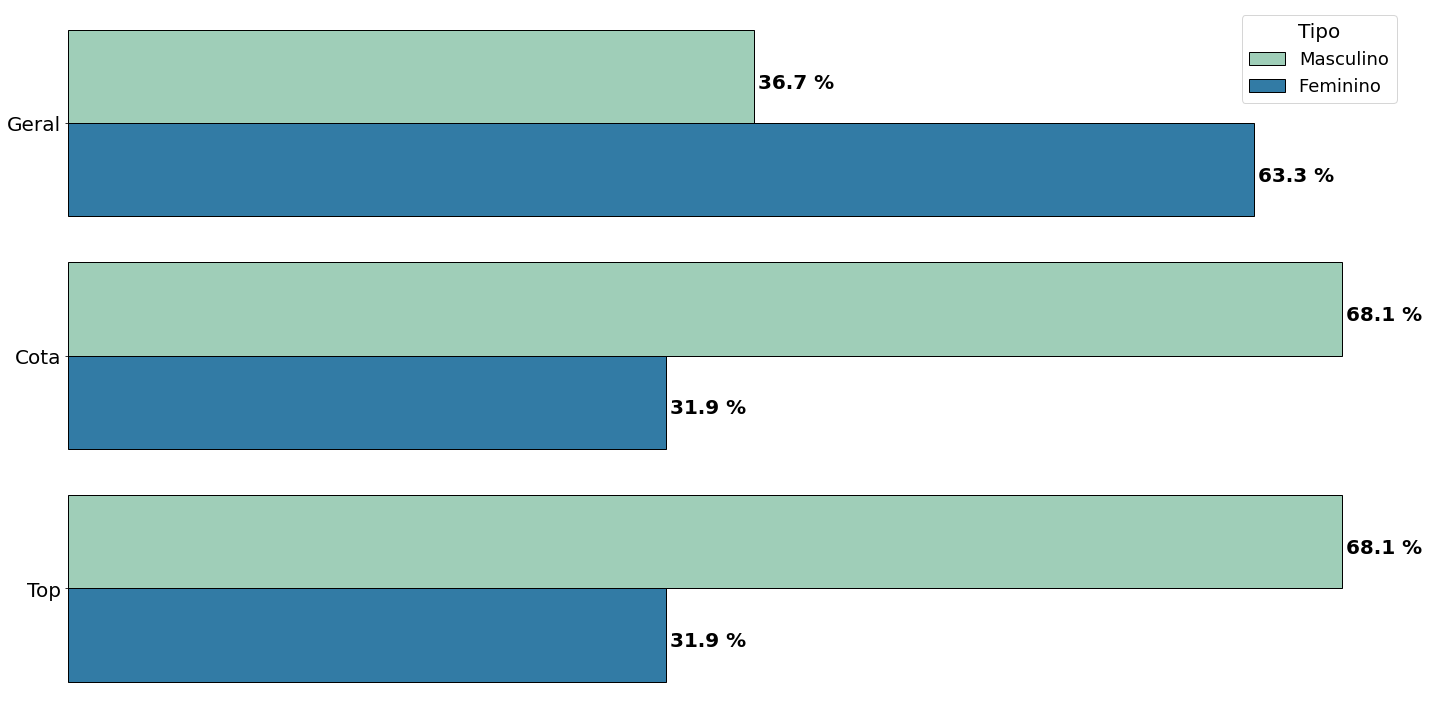

In [16]:
# Setar ambito
foco = 'TP_SEXO'
# Sexo - Geral
df1 = df_enem[[foco,'NU_INSCRICAO']].groupby(foco).count()
df1 = (100*df1/df1.sum()).round(2)
df1['TIPO'] = 'Geral'
# Sexo - Cota
df2 = df_cota[[foco,'NU_INSCRICAO']].groupby(foco).count()
df2 = (100*df2/df2.sum()).round(2)
df2['TIPO'] = 'Cota'
# Sexo - Top
df3 = df_top60[[foco,'NU_INSCRICAO']].groupby(foco).count()
df3 = (100*df3/df3.sum()).round(2)
df3['TIPO'] = 'Top'
# Dataframe de analise
df_viz = pd.concat([df1.reset_index(),df2.reset_index(),df3.reset_index()])
# Gerar gráfico
fig, ax = plt.subplots(figsize=(20, 10))
plt.yticks(fontsize=20)
ordem = ['Masculino','Feminino ']
sns.barplot(data=df_viz, hue=foco, x='NU_INSCRICAO', y='TIPO', ax=ax, palette='YlGnBu',hue_order=ordem,edgecolor='black');
# Alterar detalhes gráficos
ax.set_xlabel('', fontsize=20, weight='bold')
ax.set_ylabel('', fontsize=20, weight='bold');
ax.legend(title='Tipo', title_fontsize=20, fontsize=18);
#plt.legend([],[], frameon=False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.set_xticks([])
# Anotar valores
for rects in ax.patches:
    # Puxar informações de cada retângulo presente no gráfico
    x, y, h, w = rects.get_x(), rects.get_y(), rects.get_height(), rects.get_width()
    # Anotar
    x_an = w + 2.25
    y_an = y + (h/1.5)
    ax.text(x_an, y_an, f'{round(w,1)} %', ha="center", va="bottom", fontweight='bold', fontsize=20)
# Salvar figura
plt.tight_layout()
plt.savefig('v1_sexo.png',dpi=300, transparent=True)

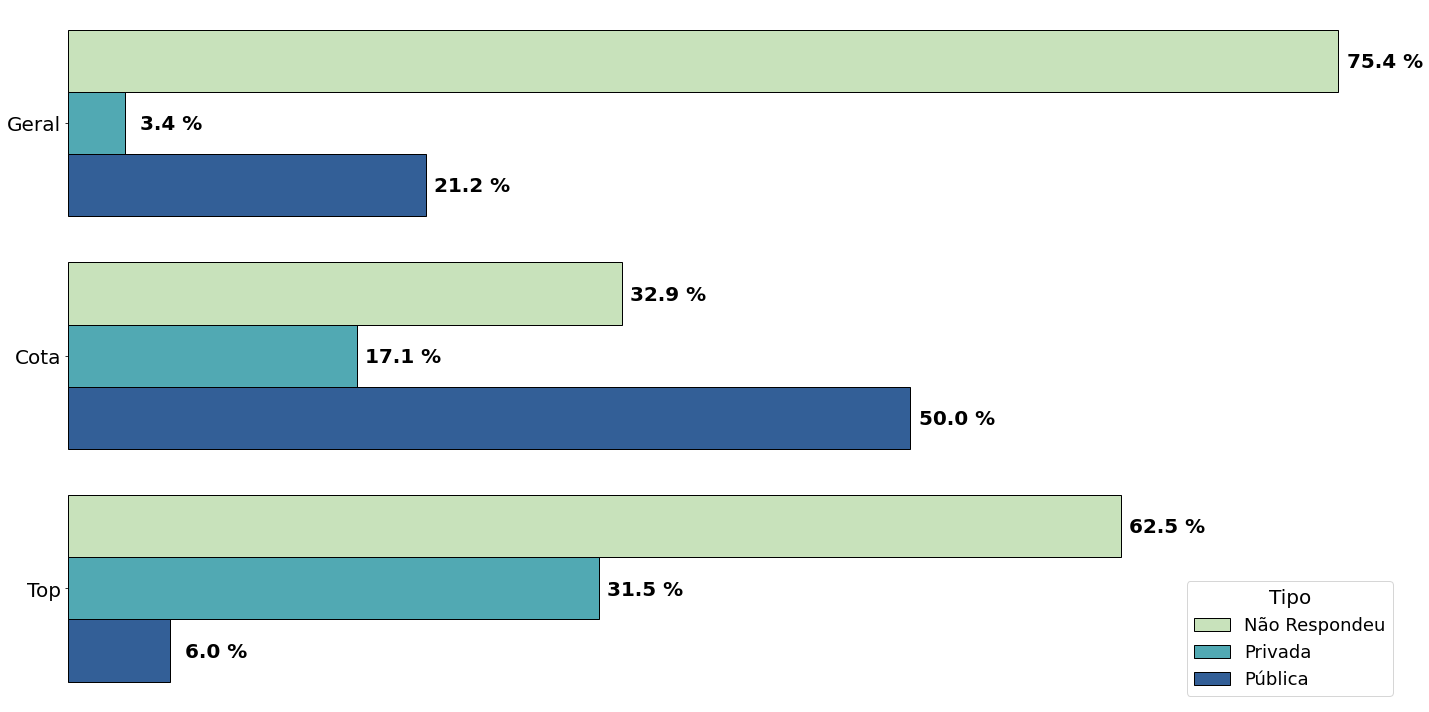

In [17]:
# Setar ambito
foco = 'TP_ESCOLA'
# Sexo - Geral
df1 = df_enem[[foco,'NU_INSCRICAO']].groupby(foco).count()
df1 = (100*df1/df1.sum()).round(2)
df1['TIPO'] = 'Geral'
# Sexo - Cota
df2 = df_cota[[foco,'NU_INSCRICAO']].groupby(foco).count()
df2 = (100*df2/df2.sum()).round(2)
df2['TIPO'] = 'Cota'
# Sexo - Top
df3 = df_top60[[foco,'NU_INSCRICAO']].groupby(foco).count()
df3 = (100*df3/df3.sum()).round(2)
df3['TIPO'] = 'Top'
# Dataframe de analise
df_viz = pd.concat([df1.reset_index(),df2.reset_index(),df3.reset_index()])
# Gerar gráfico
fig, ax = plt.subplots(figsize=(20, 10))
plt.yticks(fontsize=20)
ordem = ['Não Respondeu', 'Privada', 'Pública']
sns.barplot(data=df_viz, hue=foco, x='NU_INSCRICAO', y='TIPO', ax=ax, palette='YlGnBu',hue_order=ordem,edgecolor='black');
# Alterar detalhes gráficos
ax.set_xlabel('', fontsize=20, weight='bold')
ax.set_ylabel('', fontsize=20, weight='bold');
ax.legend(title='Tipo', title_fontsize=20, fontsize=18);
#plt.legend([],[], frameon=False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.set_xticks([])
# Anotar valores
for rects in ax.patches:
    # Puxar informações de cada retângulo presente no gráfico
    x, y, h, w = rects.get_x(), rects.get_y(), rects.get_height(), rects.get_width()
    # Anotar
    x_an = w + 2.75
    y_an = y + (h/1.5)
    ax.text(x_an, y_an, f'{round(w,1)} %', ha="center", va="bottom", fontweight='bold', fontsize=20)
# Salvar figura
plt.tight_layout()
plt.savefig('v1_escola.png',dpi=300, transparent=True)

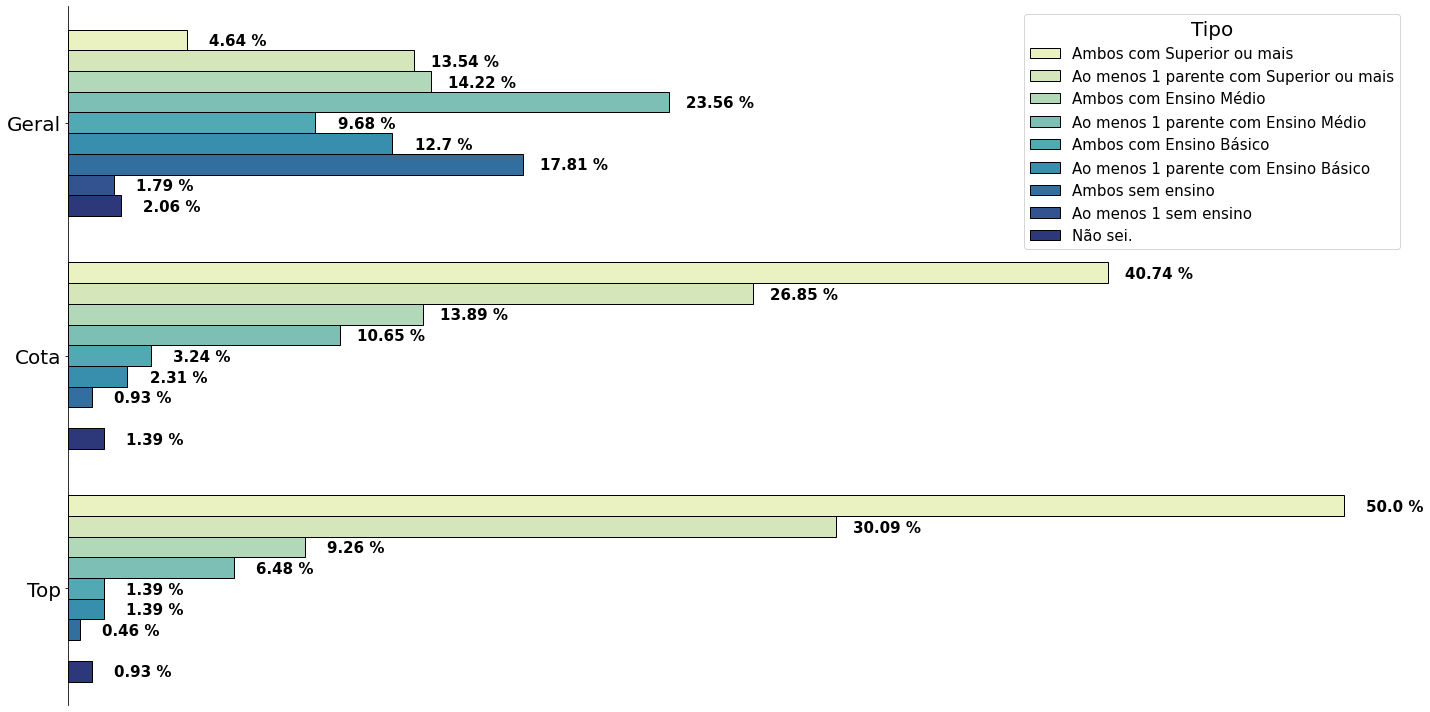

In [18]:
# Setar ambito
foco = 'ESCOLARIDADE_PARENTAL'
# Geral
df1 = df_enem[[foco,'NU_INSCRICAO']].groupby(foco).count()
df1 = (100*df1/df1.sum()).round(2)
df1['TIPO'] = 'Geral'
# Cota
df2 = df_cota[[foco,'NU_INSCRICAO']].groupby(foco).count()
df2 = (100*df2/df2.sum()).round(2)
df2['TIPO'] = 'Cota'
# Top
df3 = df_top60[[foco,'NU_INSCRICAO']].groupby(foco).count()
df3 = (100*df3/df3.sum()).round(2)
df3['TIPO'] = 'Top'
# Dataframe de analise
df_viz = pd.concat([df1.reset_index(),df2.reset_index(),df3.reset_index()])
# Gerar gráfico
fig, ax = plt.subplots(figsize=(20, 10))
plt.yticks(fontsize=20)
ordem = ['Ambos com Superior ou mais',
         'Ao menos 1 parente com Superior ou mais',
         'Ambos com Ensino Médio',
         'Ao menos 1 parente com Ensino Médio',
         'Ambos com Ensino Básico',
         'Ao menos 1 parente com Ensino Básico',
         'Ambos sem ensino',
         'Ao menos 1 sem ensino',
         'Não sei.']
sns.barplot(data=df_viz, hue=foco, x='NU_INSCRICAO', y='TIPO', ax=ax, palette='YlGnBu', hue_order=ordem, edgecolor='black');
# Alterar detalhes gráficos
ax.set_xlabel('', fontsize=20, weight='bold')
ax.set_ylabel('', fontsize=20, weight='bold');
ax.legend(title='Tipo', title_fontsize=20, fontsize=15);
#plt.legend([],[], frameon=False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
#ax.spines.left.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.set_xticks([])
# Anotar valores
for rects in ax.patches:
    # Puxar informações de cada retângulo presente no gráfico
    x, y, h, w = rects.get_x(), rects.get_y(), rects.get_height(), rects.get_width()
    # Garantir que w seja algum valor
    if pd.notnull(w):
        # Anotar
        x_an = w + 2
        y_an = y + (h/1.1)
        ax.text(x_an, y_an, f'{round(w, 2)} %', ha="center", va="bottom", fontweight='bold', fontsize=15)
# Salvar figura
plt.tight_layout()
plt.savefig('v1_ensino.png',dpi=300, transparent=True)

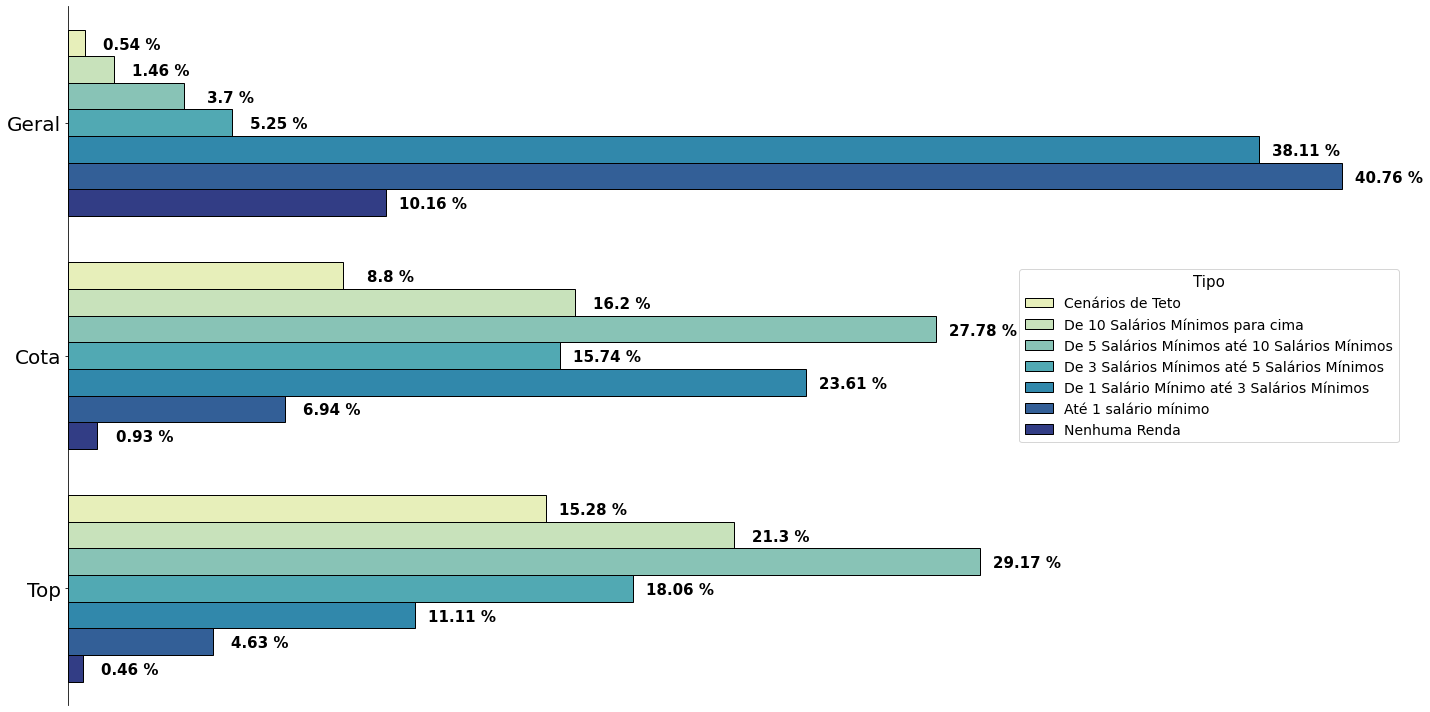

In [52]:
# Setar ambito
foco = 'RENDA_FAMILIAR'
ordem = ['Cenários de Teto',
         'De 10 Salários Mínimos para cima',
         'De 5 Salários Mínimos até 10 Salários Mínimos',
         'De 3 Salários Mínimos até 5 Salários Mínimos',
         'De 1 Salário Mínimo até 3 Salários Mínimos',
         'Até 1 salário mínimo',
         'Nenhuma Renda']
# Geral
df1 = df_enem[[foco,'NU_INSCRICAO']].groupby(foco).count()
df1 = (100*df1/df1.sum()).round(2)
df1['TIPO'] = 'Geral'
# Cota
df2 = df_cota[[foco,'NU_INSCRICAO']].groupby(foco).count()
df2 = (100*df2/df2.sum()).round(2)
df2['TIPO'] = 'Cota'
# Top
df3 = df_top60[[foco,'NU_INSCRICAO']].groupby(foco).count()
df3 = (100*df3/df3.sum()).round(2)
df3['TIPO'] = 'Top'
# Dataframe de analise
df_viz = pd.concat([df1.reset_index(),df2.reset_index(),df3.reset_index()])
# Gerar gráfico
fig, ax = plt.subplots(figsize=(20, 10))
plt.yticks(fontsize=20)
sns.barplot(data=df_viz, hue=foco, x='NU_INSCRICAO', y='TIPO', ax=ax, palette='YlGnBu', hue_order=ordem, edgecolor='black');
# Alterar detalhes gráficos
ax.set_xlabel('', fontsize=20, weight='bold')
ax.set_ylabel('', fontsize=20, weight='bold');
ax.legend(title='Tipo', title_fontsize=15, fontsize=14, loc='center right');
#plt.legend([],[], frameon=False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
#ax.spines.left.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.set_xticks([])
# Anotar valores
for rects in ax.patches:
    # Puxar informações de cada retângulo presente no gráfico
    x, y, h, w = rects.get_x(), rects.get_y(), rects.get_height(), rects.get_width()
    # Garantir que w seja algum valor
    if pd.notnull(w):
        # Anotar
        x_an = w + 1.5
        y_an = y + (h/1.2)
        ax.text(x_an, y_an, f'{round(w, 2)} %', ha="center", va="bottom", fontweight='bold', fontsize=15)
# Salvar figura
plt.tight_layout()
plt.savefig('v1_renda.png',dpi=300, transparent=True)

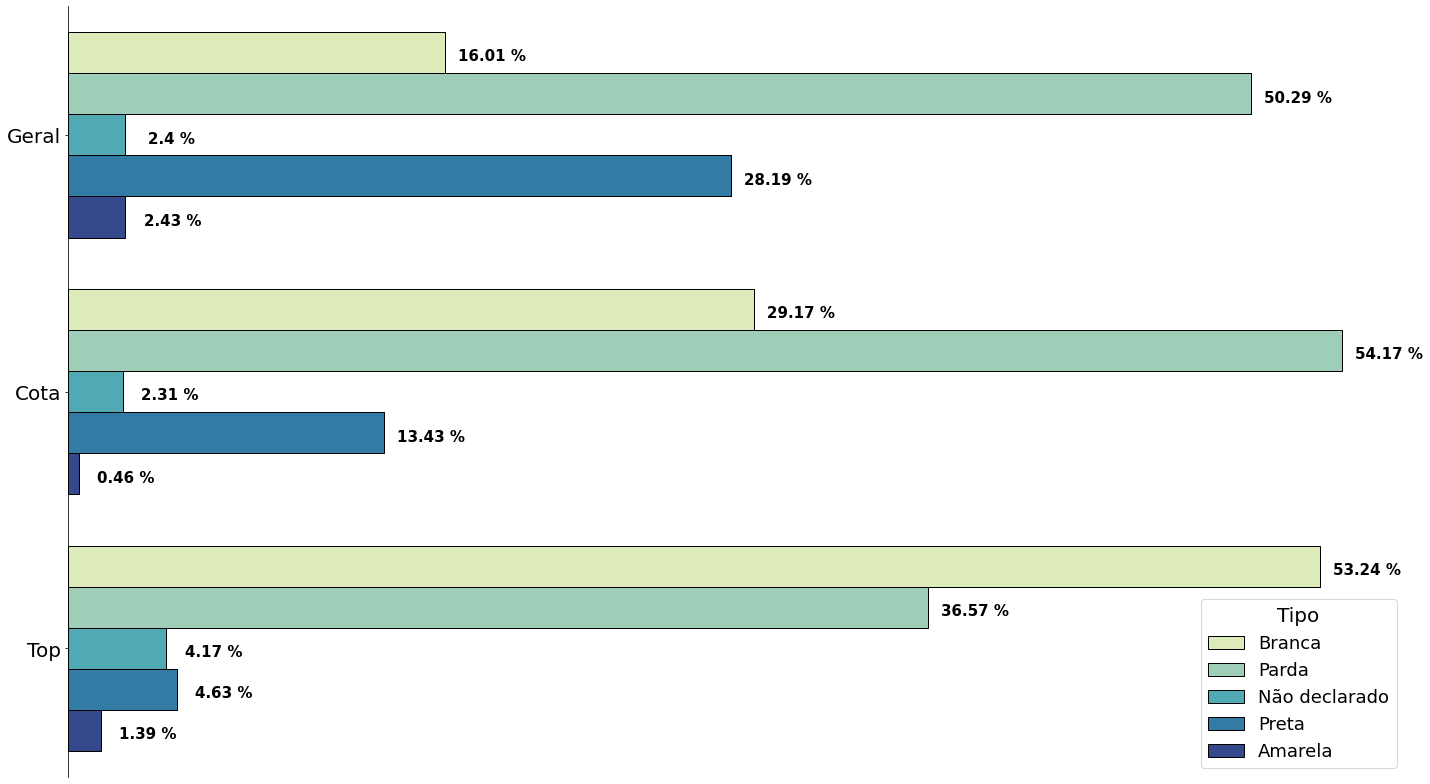

In [20]:
# Setar ambito
foco = 'TP_COR_RACA'
ordem = ['Branca','Parda','Não declarado','Preta','Amarela']
# Geral
df1 = df_enem[[foco,'NU_INSCRICAO']].groupby(foco).count()
df1 = (100*df1/df1.sum()).round(2)
df1['TIPO'] = 'Geral'
# Cota
df2 = df_cota[[foco,'NU_INSCRICAO']].groupby(foco).count()
df2 = (100*df2/df2.sum()).round(2)
df2['TIPO'] = 'Cota'
# Top
df3 = df_top60[[foco,'NU_INSCRICAO']].groupby(foco).count()
df3 = (100*df3/df3.sum()).round(2)
df3['TIPO'] = 'Top'
# Dataframe de analise
df_viz = pd.concat([df1.reset_index(),df2.reset_index(),df3.reset_index()])
# Gerar gráfico
fig, ax = plt.subplots(figsize=(20, 11))
plt.yticks(fontsize=20)
sns.barplot(data=df_viz, hue=foco, x='NU_INSCRICAO', y='TIPO', ax=ax, palette='YlGnBu', hue_order=ordem, edgecolor='black');
# Alterar detalhes gráficos
ax.set_xlabel('', fontsize=20, weight='bold')
ax.set_ylabel('', fontsize=20, weight='bold');
ax.legend(title='Tipo', title_fontsize=20, fontsize=18, loc='lower right');
#plt.legend([],[], frameon=False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
#ax.spines.left.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.set_xticks([])
# Anotar valores
for rects in ax.patches:
    # Puxar informações de cada retângulo presente no gráfico
    x, y, h, w = rects.get_x(), rects.get_y(), rects.get_height(), rects.get_width()
    # Garantir que w seja algum valor
    if pd.notnull(w):
        # Anotar
        x_an = w + 2
        y_an = y + (h/1.3)
        ax.text(x_an, y_an, f'{round(w, 2)} %', ha="center", va="bottom", fontweight='bold', fontsize=15)
# Salvar figura
plt.tight_layout()
plt.savefig('v1_raca.png',dpi=300, transparent=True)

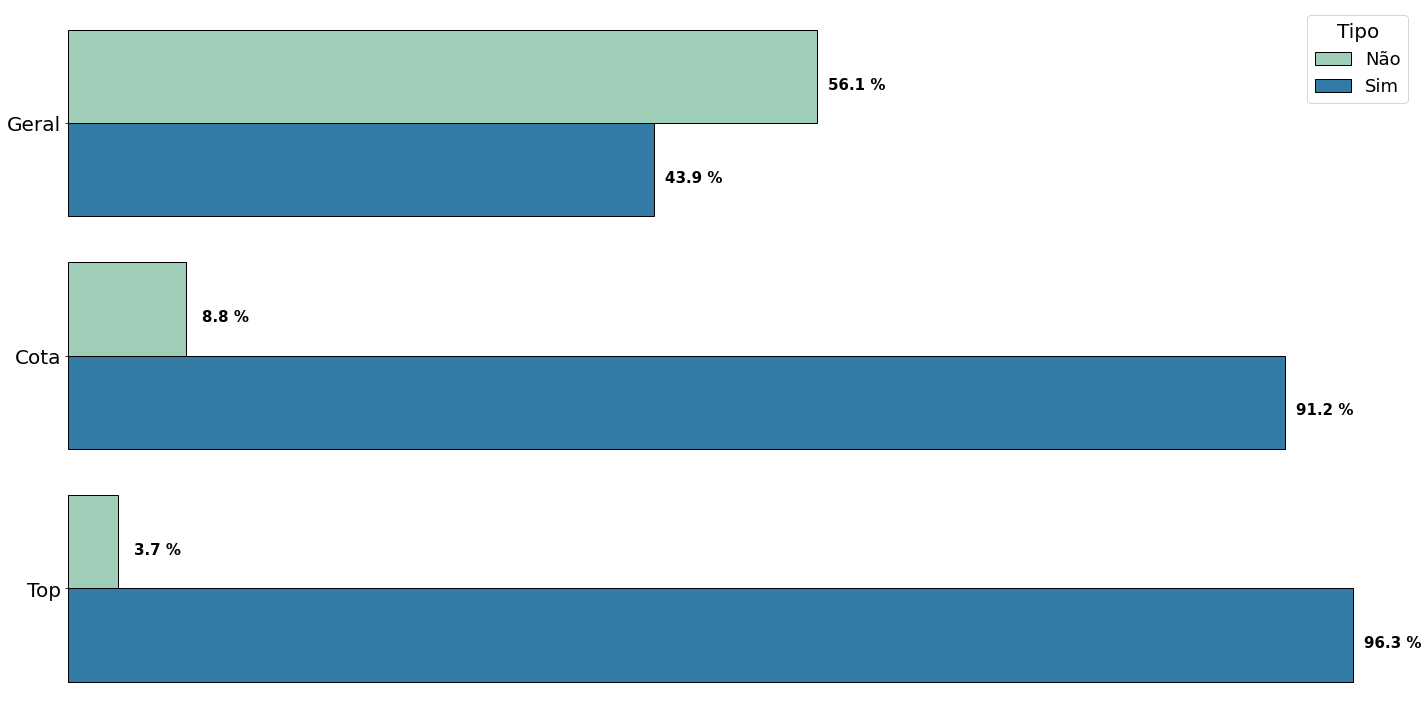

In [21]:
# Setar ambito
foco = 'TEM_COMPUTADOR'
# Sexo - Geral
df1 = df_enem[[foco,'NU_INSCRICAO']].groupby(foco).count()
df1 = (100*df1/df1.sum()).round(2)
df1['TIPO'] = 'Geral'
# Sexo - Cota
df2 = df_cota[[foco,'NU_INSCRICAO']].groupby(foco).count()
df2 = (100*df2/df2.sum()).round(2)
df2['TIPO'] = 'Cota'
# Sexo - Top
df3 = df_top60[[foco,'NU_INSCRICAO']].groupby(foco).count()
df3 = (100*df3/df3.sum()).round(2)
df3['TIPO'] = 'Top'
# Dataframe de analise
df_viz = pd.concat([df1.reset_index(),df2.reset_index(),df3.reset_index()])
# Gerar gráfico
fig, ax = plt.subplots(figsize=(20, 10))
plt.yticks(fontsize=20)
sns.barplot(data=df_viz, hue=foco, x='NU_INSCRICAO', y='TIPO', ax=ax, palette='YlGnBu',edgecolor='black');
# Alterar detalhes gráficos
ax.set_xlabel('', fontsize=20, weight='bold')
ax.set_ylabel('', fontsize=20, weight='bold');
ax.legend(title='Tipo', title_fontsize=20, fontsize=18);
#plt.legend([],[], frameon=False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.set_xticks([])
# Anotar valores
for rects in ax.patches:
    # Puxar informações de cada retângulo presente no gráfico
    x, y, h, w = rects.get_x(), rects.get_y(), rects.get_height(), rects.get_width()
    # Anotar
    x_an = w + 3
    y_an = y + (h/1.5)
    ax.text(x_an, y_an, f'{round(w,1)} %', ha="center", va="bottom", fontweight='bold', fontsize=15)
# Salvar figura
plt.tight_layout()
plt.savefig('v1_pc.png',dpi=300, transparent=True)

# Análise 2 - Notas

In [22]:
# Separar dados de pessoas que tiveram alguma nota do enem (zeraram vs não zeraram)
df_enem_zero = df_enem.loc[df_enem['NOTA_FINAL_PESO_UFBA_EE'] <= 0].copy()
# Selecionar em notas apenas alunos com total presença
c1 = (df_enem['TP_PRESENCA_CN'] == 1)&(df_enem['TP_PRESENCA_LC'] == 1)
c2 = (df_enem['TP_PRESENCA_CH'] == 1)&(df_enem['TP_PRESENCA_MT'] == 1)
df_enem_nota = df_enem.loc[c1&c2].copy()

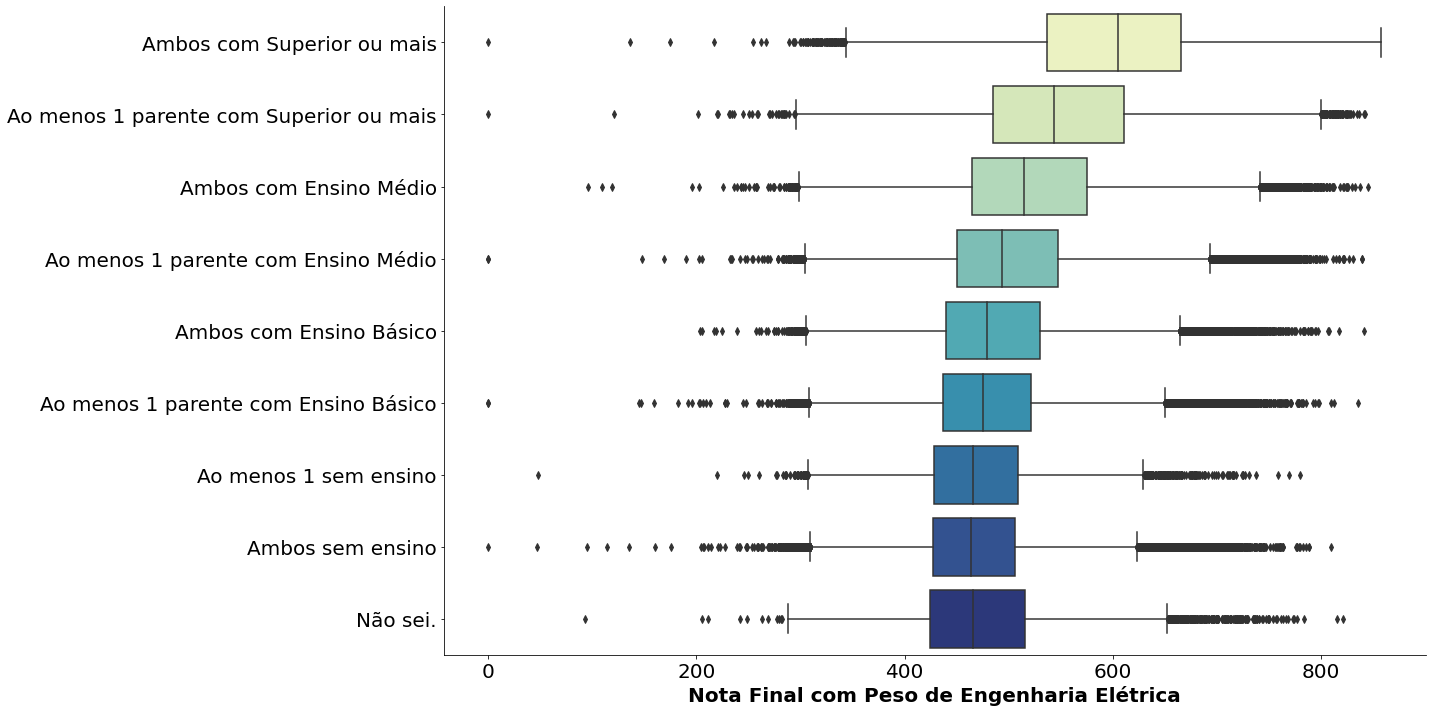

In [23]:
# Visualizar distribuição de notas por renda familiar
fig, ax = plt.subplots(figsize=(20, 10))
ordem = ['Ambos com Superior ou mais',
         'Ao menos 1 parente com Superior ou mais',
         'Ambos com Ensino Médio',
         'Ao menos 1 parente com Ensino Médio',
         'Ambos com Ensino Básico',
         'Ao menos 1 parente com Ensino Básico',
         'Ao menos 1 sem ensino','Ambos sem ensino',
         'Não sei.']
sns.boxplot(data=df_enem_nota, y='ESCOLARIDADE_PARENTAL', x='NOTA_FINAL_PESO_UFBA_EE', order=ordem, ax=ax,palette="YlGnBu");
# Detalhes gráficos
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel('Nota Final com Peso de Engenharia Elétrica', fontsize=20, weight='bold')
ax.set_ylabel('', fontsize=20, weight='bold');
# Salvar figura
plt.tight_layout()
plt.savefig('v2_notas_ep.png',dpi=300, transparent=True)

In [24]:
# Ver valores de mediana
df_aux = df_enem_nota[['ESCOLARIDADE_PARENTAL','NOTA_FINAL_PESO_UFBA_EE']].groupby('ESCOLARIDADE_PARENTAL').median()
df_aux.sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False)

,NOTA_FINAL_PESO_UFBA_EE
ESCOLARIDADE_PARENTAL,
Ambos com Superior ou mais,604.820000
Ao menos 1 parente com Superior ou mais,543.800000
Ambos com Ensino Médio,514.373333
Ao menos 1 parente com Ensino Médio,493.720000
Ambos com Ensino Básico,479.653333
Ao menos 1 parente com Ensino Básico,475.573333
Ao menos 1 sem ensino,465.453333
Não sei.,465.313333
Ambos sem ensino,463.853333


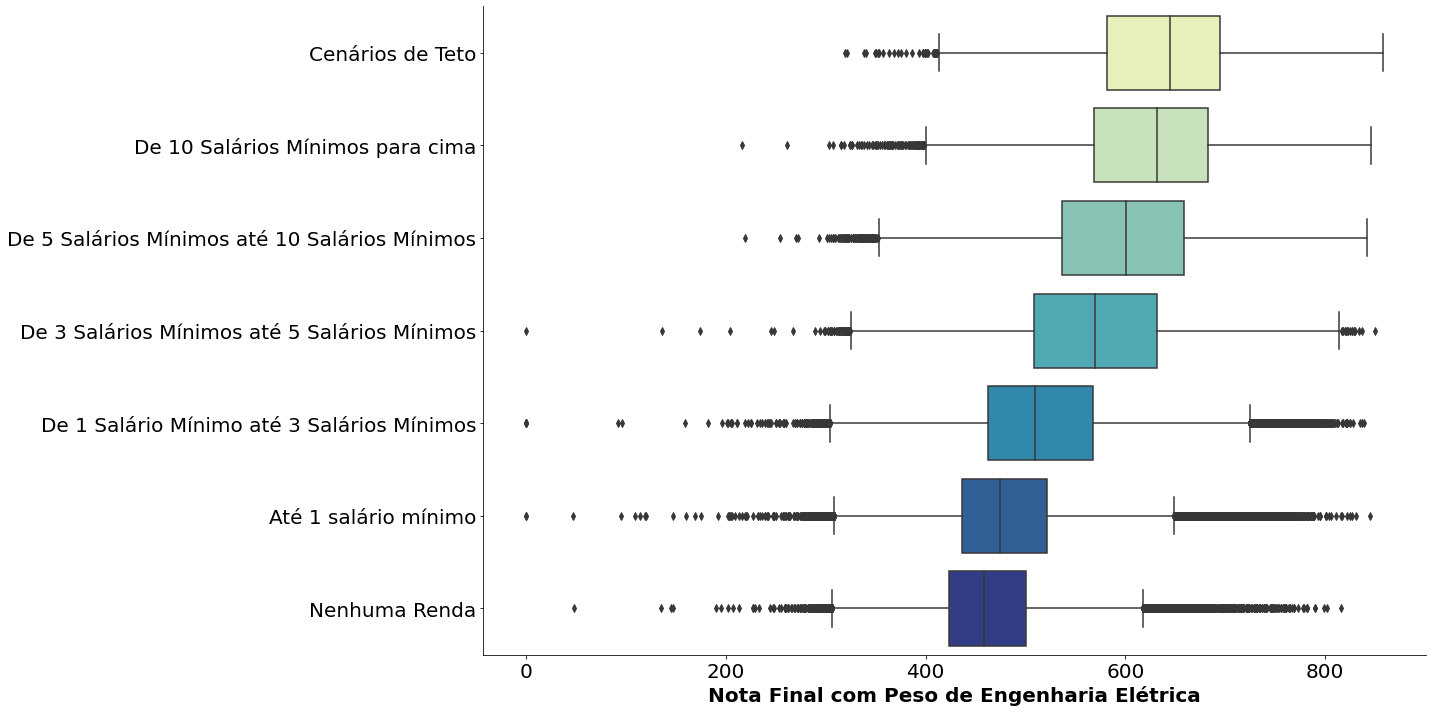

In [25]:
# Visualizar distribuição de notas por renda familiar
fig, ax = plt.subplots(figsize=(20, 10))
ordem = ['Cenários de Teto',
         'De 10 Salários Mínimos para cima',
         'De 5 Salários Mínimos até 10 Salários Mínimos',
         'De 3 Salários Mínimos até 5 Salários Mínimos',
         'De 1 Salário Mínimo até 3 Salários Mínimos',
         'Até 1 salário mínimo',
         'Nenhuma Renda']
sns.boxplot(data=df_enem_nota, y='RENDA_FAMILIAR', x='NOTA_FINAL_PESO_UFBA_EE', order=ordem, ax=ax, palette="YlGnBu");
# Detalhes gráficos
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel('Nota Final com Peso de Engenharia Elétrica', fontsize=20, weight='bold')
ax.set_ylabel('', fontsize=20, weight='bold');
# Salvar figura
plt.tight_layout()
plt.savefig('v2_notas_rf.png',dpi=300, transparent=True)

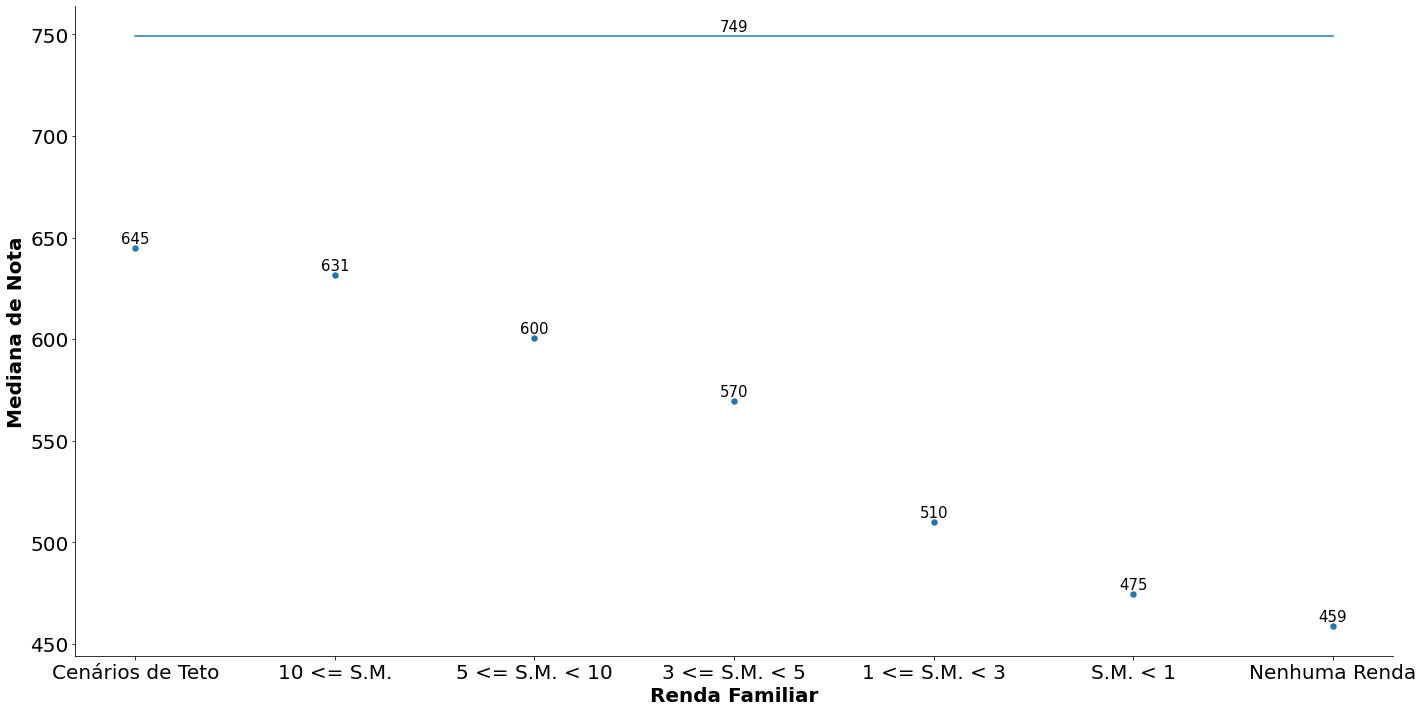

In [26]:
# Ver valores de mediana
cols = ['RENDA_FAMILIAR']
df_aux = df_enem_nota.copy()
#df_aux['TP_COR_RACA'].replace({'Amarela':'Outros','Indígena ':'Outros', 'Parda':'Outros'}, inplace=True)
df_aux = df_aux[cols + ['NOTA_FINAL_PESO_UFBA_EE']].groupby(cols).median().reset_index()
df_aux['RENDA_FAMILIAR'].replace({'De 10 Salários Mínimos para cima':'10 <= S.M.',
                                  'De 5 Salários Mínimos até 10 Salários Mínimos':'5 <= S.M. < 10',
                                  'De 3 Salários Mínimos até 5 Salários Mínimos':'3 <= S.M. < 5',
                                  'De 1 Salário Mínimo até 3 Salários Mínimos':'1 <= S.M. < 3',
                                  'Até 1 salário mínimo':'S.M. < 1'}, inplace=True)
df_aux.sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False, inplace=True)
corte_med = df_enem_nota['NOTA_CORTE_EE'].median()
# Gerar gráfico
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=df_aux, x='RENDA_FAMILIAR', y='NOTA_FINAL_PESO_UFBA_EE', ax=ax, s=50, palette="YlGnBu")
ax.plot([0, 6],[corte_med, corte_med])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
ax.set_xlabel('Renda Familiar', fontsize=20, weight='bold')
ax.set_ylabel('Mediana de Nota', fontsize=20, weight='bold');
# Anotar valores
for x_an, y_an in zip(range(0, len(df_aux)), df_aux['NOTA_FINAL_PESO_UFBA_EE']):
    # Puxar informações de cada retângulo presente no gráfico
    ax.text(x_an, y_an + 1, f'{round(y_an)}', ha="center", va="bottom", fontsize=15)
ax.text(3, corte_med + 1, f'{round(corte_med)}', ha="center", va="bottom", fontsize=15)
# Salvar figura
plt.tight_layout()
plt.savefig('v2_run_renda.png',dpi=300, transparent=True)

In [27]:
df_aux['DISTÂNCIA'] = corte_med - df_aux['NOTA_FINAL_PESO_UFBA_EE'].round(1)
df_aux['DISTANCIA_MENOR'] = (df_aux['DISTÂNCIA']/df_aux['DISTÂNCIA'].min())
df_aux[['RENDA_FAMILIAR','DISTÂNCIA','DISTANCIA_MENOR']]

,RENDA_FAMILIAR,DISTÂNCIA,DISTANCIA_MENOR
1,Cenários de Teto,104.58,1.000000
3,10 <= S.M.,117.78,1.126219
5,5 <= S.M. < 10,148.88,1.423599
4,3 <= S.M. < 5,179.58,1.717154
2,1 <= S.M. < 3,239.38,2.288965
0,S.M. < 1,274.58,2.625550
6,Nenhuma Renda,290.58,2.778543


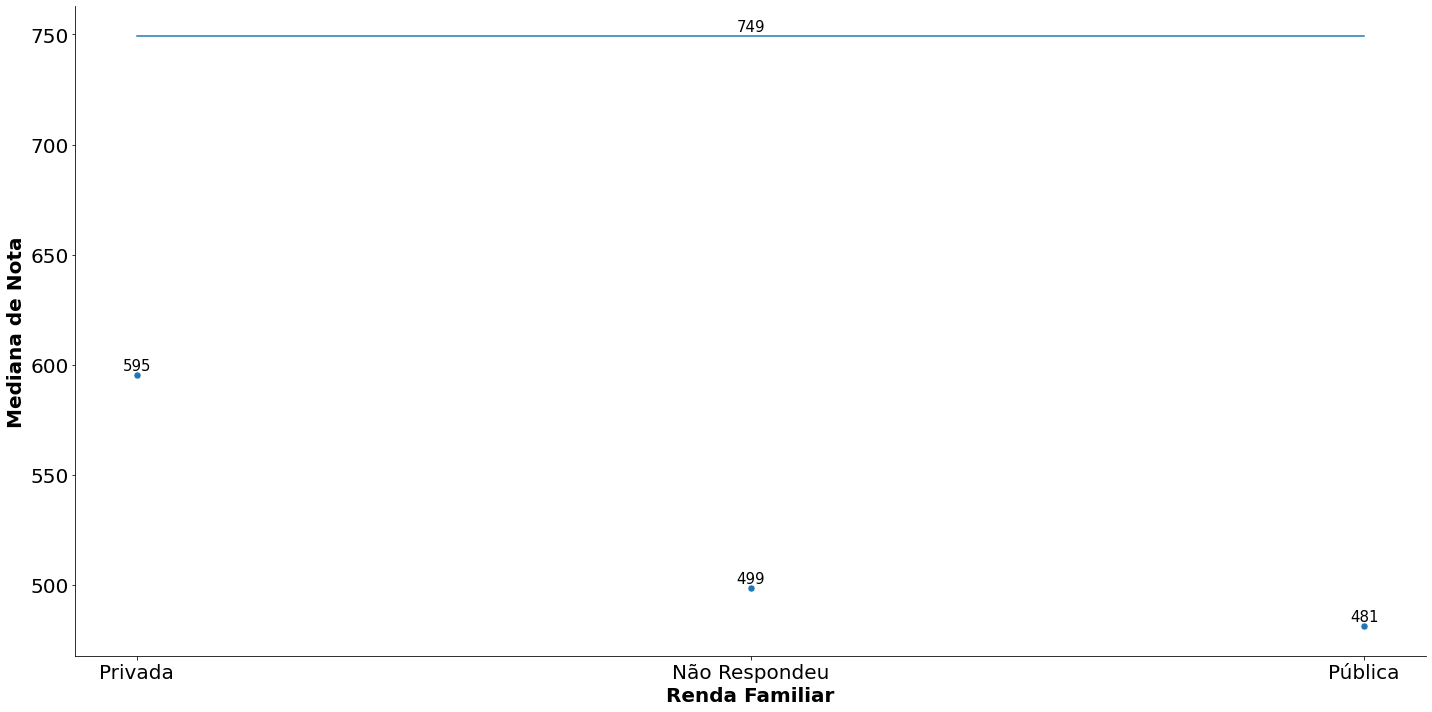

In [28]:
# Ver valores de mediana
cols = ['TP_ESCOLA']
df_aux = df_enem_nota.copy()
#df_aux['TP_COR_RACA'].replace({'Amarela':'Outros','Indígena ':'Outros', 'Parda':'Outros'}, inplace=True)
df_aux = df_aux[cols + ['NOTA_FINAL_PESO_UFBA_EE']].groupby(cols).median().reset_index()
df_aux.sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False, inplace=True)
corte_med = df_enem_nota['NOTA_CORTE_EE'].median()
# Gerar gráfico
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=df_aux, x='TP_ESCOLA', y='NOTA_FINAL_PESO_UFBA_EE', ax=ax, s=50, palette="YlGnBu")
ax.plot([0, 2],[corte_med, corte_med])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
ax.set_xlabel('Renda Familiar', fontsize=20, weight='bold')
ax.set_ylabel('Mediana de Nota', fontsize=20, weight='bold');
# Anotar valores
for x_an, y_an in zip(range(0, len(df_aux)), df_aux['NOTA_FINAL_PESO_UFBA_EE']):
    # Puxar informações de cada retângulo presente no gráfico
    ax.text(x_an, y_an + 1, f'{round(y_an)}', ha="center", va="bottom", fontsize=15)
ax.text(1, corte_med + 1, f'{round(corte_med)}', ha="center", va="bottom", fontsize=15)
# Salvar figura
plt.tight_layout()
plt.savefig('v2_run_ESCOLA.png',dpi=300, transparent=True)

In [29]:
df_aux['DISTÂNCIA'] = corte_med - df_aux['NOTA_FINAL_PESO_UFBA_EE'].round(1)
df_aux['DISTANCIA_MENOR'] = (df_aux['DISTÂNCIA']/df_aux['DISTÂNCIA'].min())
df_aux[['TP_ESCOLA','DISTÂNCIA','DISTANCIA_MENOR']]

,TP_ESCOLA,DISTÂNCIA,DISTANCIA_MENOR
1,Privada,153.98,1.000000
0,Não Respondeu,250.58,1.627354
2,Pública,267.98,1.740356


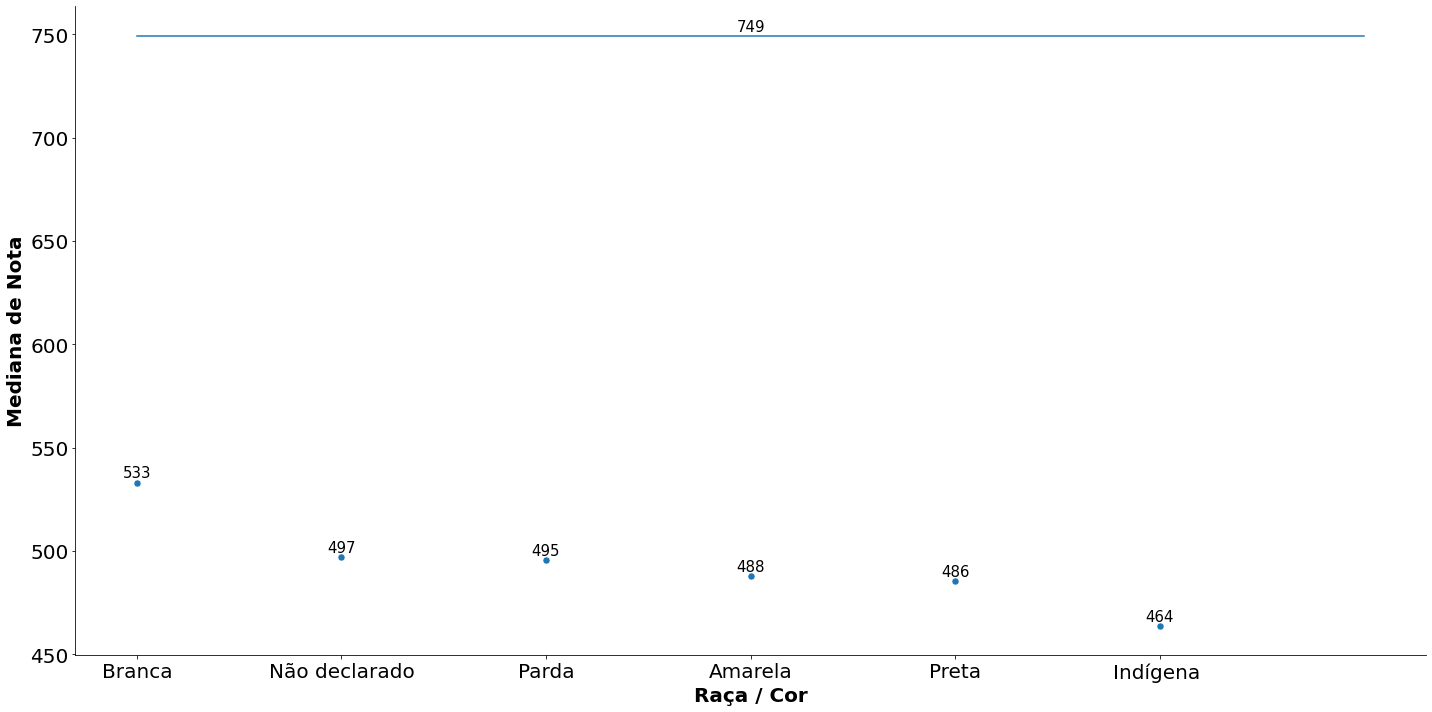

In [30]:
# Ver valores de mediana
cols = ['TP_COR_RACA']
df_aux = df_enem_nota.copy()
#df_aux['TP_COR_RACA'].replace({'Amarela':'Outros','Indígena ':'Outros', 'Parda':'Outros'}, inplace=True)
df_aux = df_aux[cols + ['NOTA_FINAL_PESO_UFBA_EE']].groupby(cols).median().reset_index()
df_aux.sort_values('NOTA_FINAL_PESO_UFBA_EE', ascending=False, inplace=True)
corte_med = df_enem_nota['NOTA_CORTE_EE'].median()
# Gerar gráfico
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=df_aux, x='TP_COR_RACA', y='NOTA_FINAL_PESO_UFBA_EE', ax=ax, s=50, palette="YlGnBu")
ax.plot([0, 6],[corte_med, corte_med])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
ax.set_xlabel('Raça / Cor', fontsize=20, weight='bold')
ax.set_ylabel('Mediana de Nota', fontsize=20, weight='bold');
# Anotar valores
for x_an, y_an in zip(range(0, len(df_aux)), df_aux['NOTA_FINAL_PESO_UFBA_EE']):
    # Puxar informações de cada retângulo presente no gráfico
    ax.text(x_an, y_an + 1, f'{round(y_an)}', ha="center", va="bottom", fontsize=15)
ax.text(3, corte_med + 1, f'{round(corte_med)}', ha="center", va="bottom", fontsize=15);
# Salvar figura
plt.tight_layout()
plt.savefig('v2_run_raca.png',dpi=300, transparent=True)

In [31]:
df_aux['DISTÂNCIA'] = corte_med - df_aux['NOTA_FINAL_PESO_UFBA_EE']
df_aux['DISTANCIA_MENOR'] = (df_aux['DISTÂNCIA']/df_aux['DISTÂNCIA'].min())
df_aux[['TP_COR_RACA','DISTÂNCIA','DISTANCIA_MENOR']]

,TP_COR_RACA,DISTÂNCIA,DISTANCIA_MENOR
1,Branca,216.173333,1.000000
3,Não declarado,252.173333,1.166533
4,Parda,253.813333,1.174120
0,Amarela,261.480000,1.209585
5,Preta,263.653333,1.219639
2,Indígena,285.413333,1.320299


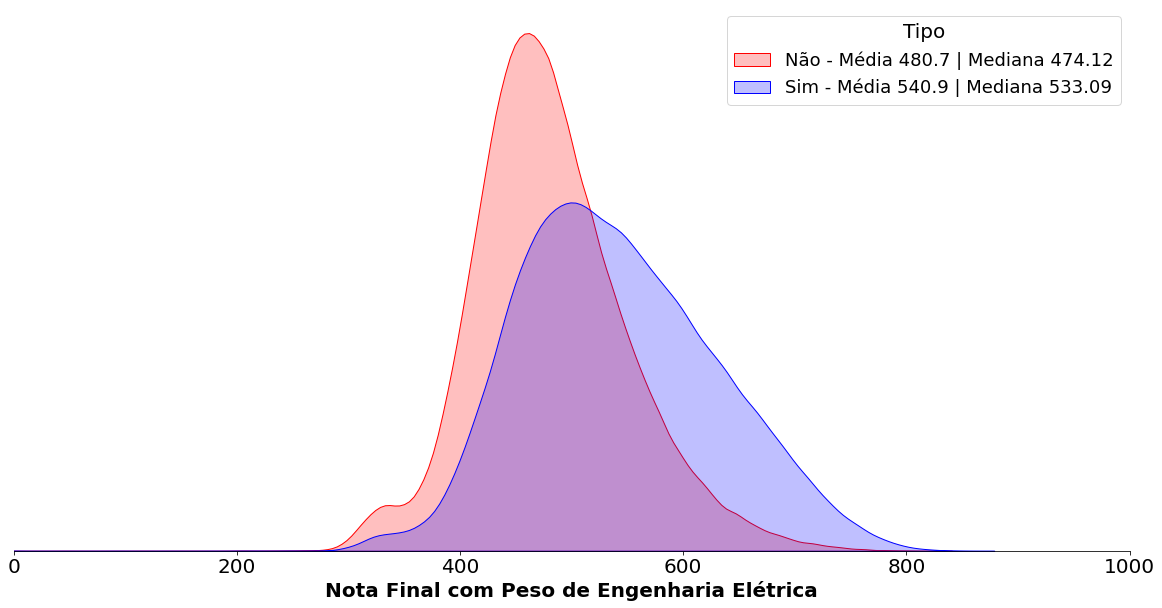

In [32]:
# KDE
s0 = df_enem_nota.loc[df_enem_nota['TEM_COMPUTADOR']=='Não','NOTA_FINAL_PESO_UFBA_EE'].values
s1 = df_enem_nota.loc[df_enem_nota['TEM_COMPUTADOR']=='Sim','NOTA_FINAL_PESO_UFBA_EE'].values

# Plot
fig, ax = plt.subplots(figsize=(20, 10))
sns.kdeplot(x=s0, color='red', shade=True,ax=ax, label=f'Não - Média {np.mean(s0).round(1)} | Mediana {np.median(s0).round(2)}')
sns.kdeplot(x=s1, color='blue', shade=True,ax=ax, label=f'Sim - Média {np.mean(s1).round(1)} | Mediana {np.median(s1).round(2)}')
ax.set_xlim([0, 1000])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)
ax.set_yticks([])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
ax.set_xlabel('Nota Final com Peso de Engenharia Elétrica', fontsize=20, weight='bold')
ax.set_ylabel('', fontsize=20, weight='bold');
ax.legend(title='Tipo',title_fontsize=20, fontsize=18);
plt.savefig('v2_run_pc',dpi=300, transparent=True)

In [33]:
# KDE
s0 = df_enem_nota.loc[df_enem_nota['TP_ESCOLA']=='Pública','NOTA_FINAL_PESO_UFBA_EE'].values
s1 = df_enem_nota.loc[df_enem_nota['TP_ESCOLA']=='Privada','NOTA_FINAL_PESO_UFBA_EE'].values
s2 = df_enem_nota.loc[df_enem_nota['TP_ESCOLA']=='Não Respondeu','NOTA_FINAL_PESO_UFBA_EE'].values

# Labels
ls0 = f'Pública - Média {np.mean(s0).round(1)} | Mediana {np.median(s0).round(2)}'
ls1 = f'Privada - Média {np.mean(s1).round(1)} | Mediana {np.median(s1).round(2)}'
ls2 = f'Não Respondeu - Média {np.mean(s2).round(1)} | Mediana {np.median(s2).round(2)}'

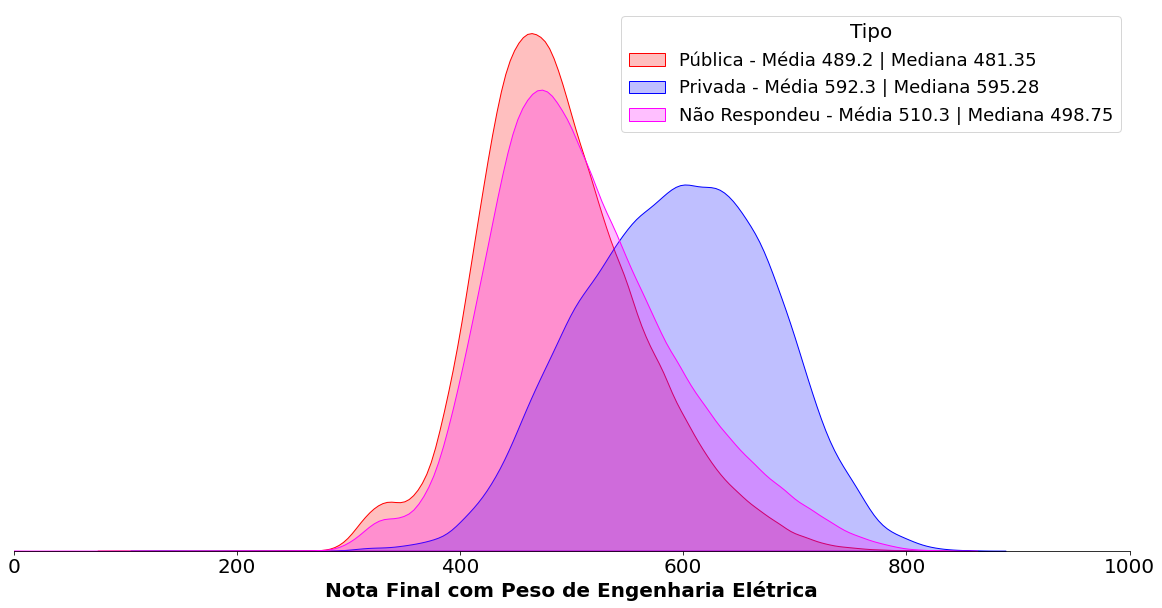

In [34]:
# Plot
fig, ax = plt.subplots(figsize=(20, 10))
sns.kdeplot(x=s0, color='red', shade=True,ax=ax, label=ls0)
sns.kdeplot(x=s1, color='blue', shade=True,ax=ax, label=ls1)
sns.kdeplot(x=s2, color='magenta', shade=True,ax=ax, label=ls2)
ax.set_xlim([0, 1000])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)
ax.set_yticks([])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
ax.set_xlabel('Nota Final com Peso de Engenharia Elétrica', fontsize=20, weight='bold')
ax.set_ylabel('', fontsize=20, weight='bold');
ax.legend(title='Tipo',title_fontsize=20, fontsize=18);
plt.savefig('v2_run_escola',dpi=300, transparent=True)

In [35]:
# Existe diferença estatística entre Não respondeu e pública?
cond = df_enem_nota['NOTA_FINAL_PESO_UFBA_EE'] > 0
s0 = df_enem_nota.loc[cond&(df_enem_nota['TP_ESCOLA']=='Pública'),'NOTA_FINAL_PESO_UFBA_EE']
s1 = df_enem_nota.loc[cond&(df_enem_nota['TP_ESCOLA']=='Não Respondeu'),'NOTA_FINAL_PESO_UFBA_EE']

# Checar tamanhos
print(s0.shape[0], s1.shape[0])

# Averiguar com testes estatísticos
fazer_amostragem_teste(s0, s1, n_amostra=1000)
# Averiguar com testes estatísticos
fazer_amostragem_teste_distribuicao(s0, s1, n_amostra=1000)

168065 466769
# Resultado Direto - Rejeitamos H0 -> Mediana dos grupos não equivalentes
> Quantidade de repetições: 1000
> H0 - Mediana dos grupos equivalentes
> Vezes que rejeitamos H0: 997
> Vezes que falhamos em rejeitar H0: 3
# Resultado Direto - Rejeitamos H0 -> Amostras não vem da mesma distribuição
> Quantidade de repetições: 1000
> H0 - Amostras vem da mesma distribuição
> Vezes que rejeitamos H0: 986
> Vezes que falhamos em rejeitar H0: 14


# Análise 3 - Crossmap RF vs EP

[Fonte do cramers V](https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix)

In [36]:
def calcular_cramersV_unbiased(x:pd.Series, y:pd.Series):
    """
    Calculate Cramers V statistic for categorial-categorial association.
    Uses correction from Bergsma and Wicher, Journal of the Korean Statistical Society 42 (2013): 323-328
    Uses bias correction from en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
    """
    # Definir resultado arbitrário para caso exista constante
    result = -1
    # Avaliar se existe caso constante para então montar matrix de confusão
    if x.nunique() == 1:
        print("X é constante")
    if y.nunique() == 1:
        print("Y é constante")
    # Caso ambos não sejam constantes, calcular correlação
    else:
        # Gerar matrix de confusão entre X e Y
        conf_matrix=pd.crosstab(x, y)
        # Avaliar se é uma matrix 2x2 para definir parâmetro correct
        if conf_matrix.shape[0] == 2:
            correct=False
        else:
            correct=True
        # Calcular termos do Cramers V
        chi2 = stats.chi2_contingency(conf_matrix, correction=correct)[0]
        n = sum(conf_matrix.sum())
        phi2 = chi2/n
        r,k = conf_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        result = np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
    
    # Retornar resultado
    return round(result,3)

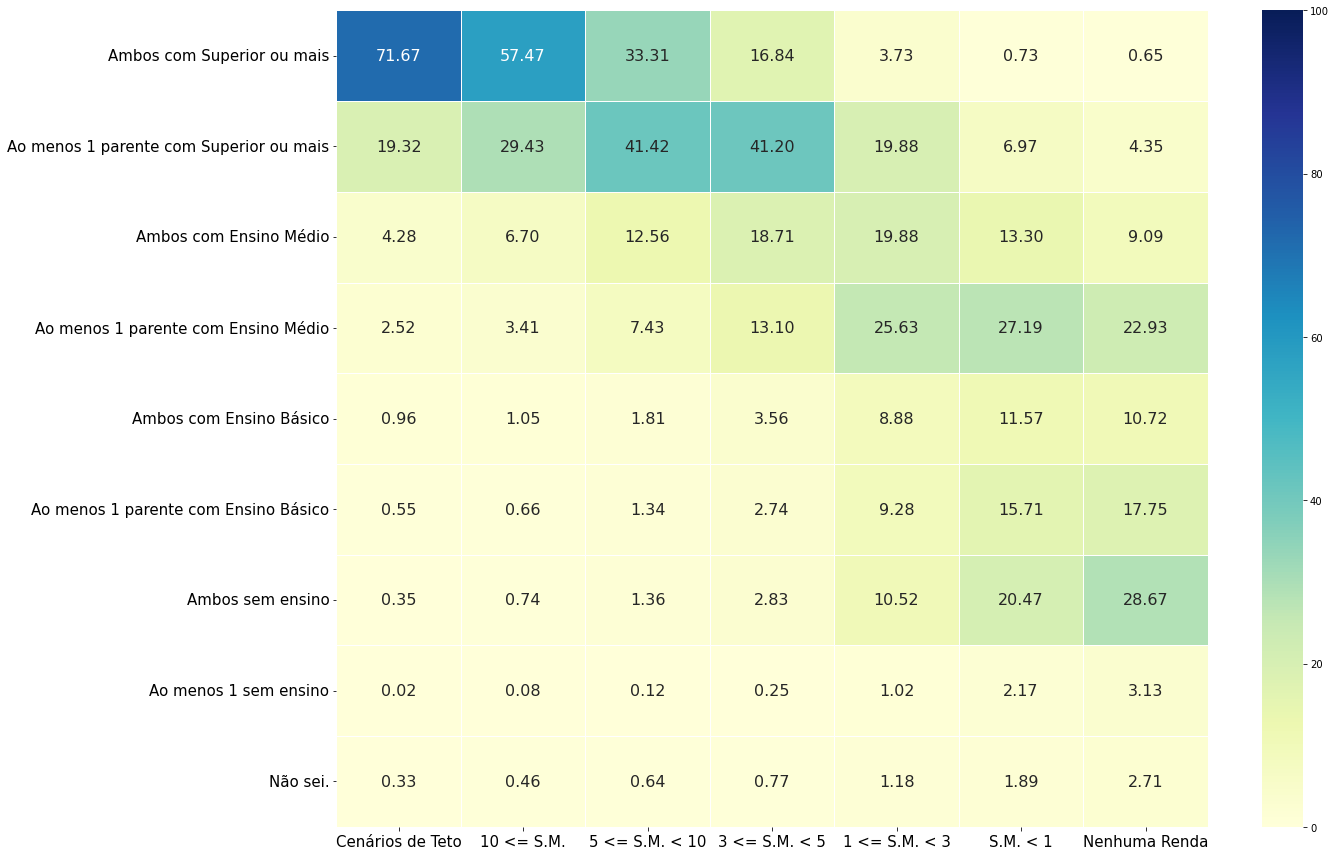

In [37]:
df_cross = pd.crosstab(df_enem_nota['ESCOLARIDADE_PARENTAL'], df_enem_nota['RENDA_FAMILIAR'])
df_cross = (100*df_cross/df_cross.sum()).round(2)

# Reordenar
ordem_col = ['Cenários de Teto','De 10 Salários Mínimos para cima','De 5 Salários Mínimos até 10 Salários Mínimos',
             'De 3 Salários Mínimos até 5 Salários Mínimos','De 1 Salário Mínimo até 3 Salários Mínimos',
             'Até 1 salário mínimo','Nenhuma Renda']
ordem_row = ['Ambos com Superior ou mais','Ao menos 1 parente com Superior ou mais',
             'Ambos com Ensino Médio','Ao menos 1 parente com Ensino Médio',
             'Ambos com Ensino Básico','Ao menos 1 parente com Ensino Básico',
             'Ambos sem ensino','Ao menos 1 sem ensino','Não sei.']
df_cross = df_cross.loc[ordem_row, ordem_col]
df_cross.rename(columns={'De 10 Salários Mínimos para cima':'10 <= S.M.',
                 'De 5 Salários Mínimos até 10 Salários Mínimos':'5 <= S.M. < 10',
                 'De 3 Salários Mínimos até 5 Salários Mínimos':'3 <= S.M. < 5',
                 'De 1 Salário Mínimo até 3 Salários Mínimos':'1 <= S.M. < 3',
                 'Até 1 salário mínimo':'S.M. < 1'}, inplace=True)
# Visualizar
plt.figure(figsize=(20, 12))
sns.heatmap(data=df_cross, vmin=0, vmax=100, annot=True, fmt = '.2f', linewidth=1., cmap="YlGnBu", annot_kws={"size": 16});
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);
plt.xlabel('', fontsize=20, weight='bold')
plt.ylabel('', fontsize=20, weight='bold');
plt.tight_layout()
plt.savefig('v3_heatmap_ef_rf',dpi=300, transparent=True)

In [38]:
# Correlação - Ao menos 1 sup para cima vs diferentes tipos de renda
v_ep = df_enem_nota['ESCOLARIDADE_PARENTAL'].isin(['Ambos com Superior ou mais'])
v_ep = v_ep.astype(int)

# Loop para avaliar correlação da variável anterior contra todos os tipos de renda
for rf in df_enem_nota['RENDA_FAMILIAR'].dropna().unique():
    # Puxar booleana desta variável
    v_rf = df_enem_nota['RENDA_FAMILIAR'].isin([rf]).astype(int)
    # Calcular correlação
    corr_cramers = calcular_cramersV_unbiased(v_ep, v_rf)
    # Fazer Report
    print(f'> Correlação de {100*corr_cramers} para {rf}')

> Correlação de 29.799999999999997 para De 10 Salários Mínimos para cima
> Correlação de 7.9 para De 1 Salário Mínimo até 3 Salários Mínimos
> Correlação de 22.7 para Cenários de Teto
> Correlação de 25.7 para De 5 Salários Mínimos até 10 Salários Mínimos
> Correlação de 17.5 para Até 1 salário mínimo
> Correlação de 11.899999999999999 para De 3 Salários Mínimos até 5 Salários Mínimos
> Correlação de 7.000000000000001 para Nenhuma Renda


In [39]:
# Correlação direta
calcular_cramersV_unbiased(df_enem_nota['ESCOLARIDADE_PARENTAL'], df_enem_nota['RENDA_FAMILIAR'])

0.261

# Análise 3 - RF vs RAÇA

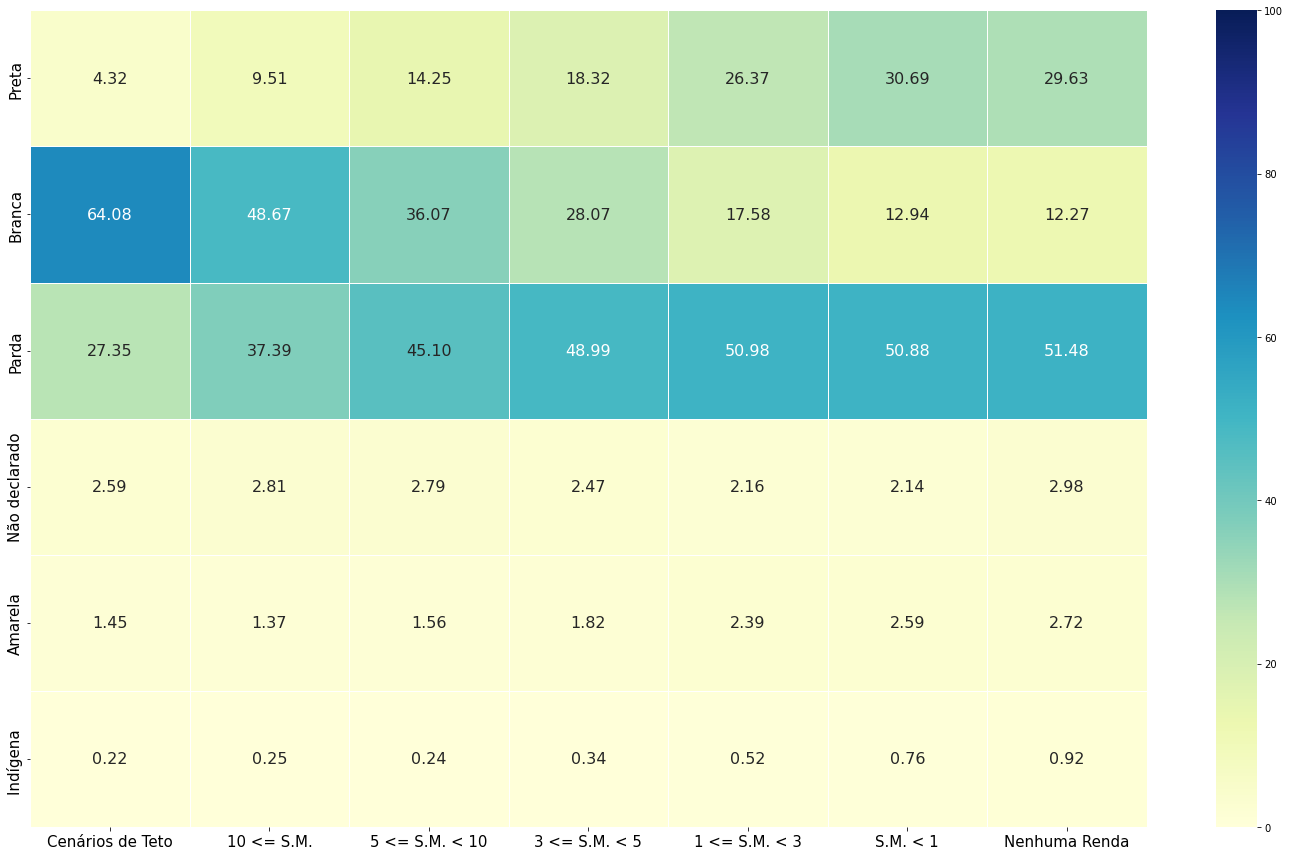

In [40]:
df_cross = pd.crosstab(df_enem_nota['TP_COR_RACA'], df_enem_nota['RENDA_FAMILIAR'])
df_cross = (100*df_cross/df_cross.sum()).round(2)

# Reordenar
ordem_col = ['Cenários de Teto','De 10 Salários Mínimos para cima','De 5 Salários Mínimos até 10 Salários Mínimos',
             'De 3 Salários Mínimos até 5 Salários Mínimos','De 1 Salário Mínimo até 3 Salários Mínimos',
             'Até 1 salário mínimo','Nenhuma Renda']
ordem_row = ['Preta', 'Branca', 'Parda', 'Não declarado', 'Amarela','Indígena ']
df_cross = df_cross.loc[ordem_row, ordem_col]
df_cross.rename(columns={'De 10 Salários Mínimos para cima':'10 <= S.M.',
                 'De 5 Salários Mínimos até 10 Salários Mínimos':'5 <= S.M. < 10',
                 'De 3 Salários Mínimos até 5 Salários Mínimos':'3 <= S.M. < 5',
                 'De 1 Salário Mínimo até 3 Salários Mínimos':'1 <= S.M. < 3',
                 'Até 1 salário mínimo':'S.M. < 1'}, inplace=True)
# Visualizar
plt.figure(figsize=(20, 12))
sns.heatmap(data=df_cross, vmin=0, vmax=100, annot=True, fmt = '.2f', linewidth=1., cmap="YlGnBu", annot_kws={"size": 16});
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);
plt.xlabel('', fontsize=20, weight='bold')
plt.ylabel('', fontsize=20, weight='bold');
plt.tight_layout()
plt.savefig('v3_heatmap_raca_rf',dpi=300, transparent=True)

In [41]:
# Correlação direta
calcular_cramersV_unbiased(df_enem_nota['TP_COR_RACA'], df_enem_nota['RENDA_FAMILIAR'])

0.101

In [42]:
# Correlação - Ao menos 1 sup para cima vs diferentes tipos de renda
v_ep = df_enem_nota['RENDA_FAMILIAR'].isin(['Cenários de Teto','De 10 Salários Mínimos para cima'])
v_ep = v_ep.astype(int)

# Loop para avaliar correlação da variável anterior contra todos os tipos de renda
for rf in df_enem_nota['TP_COR_RACA'].dropna().unique():
    # Puxar booleana desta variável
    v_rf = df_enem_nota['TP_COR_RACA'].isin([rf]).astype(int)
    # Calcular correlação
    corr_cramers = calcular_cramersV_unbiased(v_ep, v_rf)
    # Fazer Report
    print(f'> Correlação de {corr_cramers} para {rf}')

> Correlação de 0.068 para Preta
> Correlação de 0.148 para Branca
> Correlação de 0.05 para Parda
> Correlação de 0.005 para Não declarado
> Correlação de 0.011 para Amarela
> Correlação de 0.008 para Indígena 


# Análise 5 - RAÇA com NOTA CATEGORIZADA

In [43]:
# Criar variável
limites = [-float("inf"), 450, 550, 650, 750, float("inf")]
df_enem_nota['NOTA_EE_CATEGORIZADA'] = pd.cut(df_enem_nota['NOTA_FINAL_PESO_UFBA_EE'], bins=limites).astype(str)

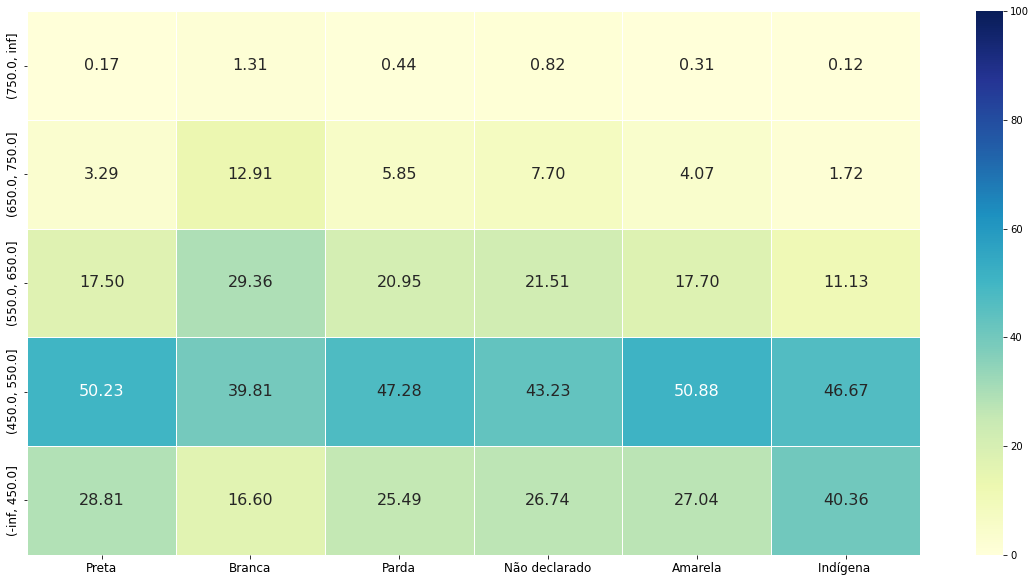

In [44]:
df_cross = pd.crosstab(df_enem_nota['NOTA_EE_CATEGORIZADA'], df_enem_nota['TP_COR_RACA'])
df_cross = (100*df_cross/df_cross.sum()).round(2)

# Reordenar
ordem_col = ['Preta', 'Branca', 'Parda', 'Não declarado', 'Amarela','Indígena ']
ordem_row = ['(750.0, inf]', '(650.0, 750.0]', '(550.0, 650.0]', '(450.0, 550.0]', '(-inf, 450.0]']
df_cross = df_cross.loc[ordem_row, ordem_col]
# Visualizar
plt.figure(figsize=(20, 10))
sns.heatmap(data=df_cross, vmin=0, vmax=100, annot=True, fmt = '.2f', linewidth=1., cmap="YlGnBu", annot_kws={"size": 16});
plt.yticks(fontsize=12);
plt.xticks(fontsize=12);
plt.xlabel('');
plt.ylabel('');

In [45]:
# Correlação direta
calcular_cramersV_unbiased(df_enem_nota['NOTA_EE_CATEGORIZADA'], df_enem_nota['TP_COR_RACA'])

0.096

In [46]:
# Correlação - Ao menos 1 sup para cima vs diferentes tipos de renda
v_ep = df_enem_nota['NOTA_EE_CATEGORIZADA'].isin(['(750.0, inf]', '(650.0, 750.0]'])
v_ep = v_ep.astype(int)

# Loop para avaliar correlação da variável anterior contra todos os tipos de renda
for rf in df_enem_nota['TP_COR_RACA'].dropna().unique():
    # Puxar booleana desta variável
    v_rf = df_enem_nota['TP_COR_RACA'].isin([rf]).astype(int)
    # Calcular correlação
    corr_cramers = calcular_cramersV_unbiased(v_ep, v_rf)
    # Fazer Report
    print(f'> Correlação de {corr_cramers} para {rf}')

> Correlação de 0.082 para Preta
> Correlação de 0.134 para Branca
> Correlação de 0.025 para Parda
> Correlação de 0.01 para Não declarado
> Correlação de 0.016 para Amarela
> Correlação de 0.016 para Indígena 


# Salvar bases para análise

In [55]:
# Salvar
df_enem.to_csv('dados/enem_analise_completa.csv', index=False)

In [56]:
# Apenas participantes com presenca
df_enem_nota.to_csv('dados/enem_analise_presenca_completa.csv', index=False)